In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode

In [33]:
train = pd.read_csv("/kaggle/input/world2/World_Happiness_Report_2022_Encoded.csv")

In [34]:
train

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,...,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen*,Country_Zambia,Country_Zimbabwe
0,1,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,...,0,0,0,0,0,0,0,0,0,0
1,2,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,...,0,0,0,0,0,0,0,0,0,0
2,3,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,...,0,0,0,0,0,0,0,0,0,0
3,4,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,...,0,0,0,0,0,0,0,0,0,0
4,5,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,...,0,0,0,0,0,0,0,0,0,0
142,143,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,...,0,0,0,0,0,0,0,0,0,0
143,144,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,...,0,0,0,0,0,0,0,0,0,1
144,145,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Columns: 156 entries, RANK to Country_Zimbabwe
dtypes: float64(10), int64(146)
memory usage: 178.1 KB


Let's look at the statistics of the dataset

In [36]:
train.describe().style.background_gradient(cmap = "RdPu")

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Country_Albania,Country_Algeria,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan*,Country_Bahrain,Country_Bangladesh,Country_Belarus*,Country_Belgium,Country_Benin,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana*,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chad*,Country_Chile,Country_China,Country_Colombia,Country_Comoros*,Country_Congo,Country_Costa Rica,Country_Croatia,Country_Cyprus,Country_Czechia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,"Country_Eswatini, Kingdom of*",Country_Ethiopia,Country_Finland,Country_France,Country_Gabon,Country_Gambia*,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala*,Country_Guinea,Country_Honduras,Country_Hong Kong S.A.R. of China,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Ivory Coast,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kosovo,Country_Kuwait*,Country_Kyrgyzstan,Country_Laos,Country_Latvia,Country_Lebanon,Country_Lesotho*,Country_Liberia*,Country_Libya*,Country_Lithuania,Country_Luxembourg*,Country_Madagascar*,Country_Malawi,Country_Malaysia,Country_Mali,Country_Malta,Country_Mauritania*,Country_Mauritius,Country_Mexico,Country_Moldova,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger*,Country_Nigeria,Country_North Cyprus*,Country_North Macedonia,Country_Norway,Country_Pakistan,Country_Palestinian Territories*,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Romania,Country_Russia,Country_Rwanda*,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Taiwan Province of China,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Tunisia,Country_Turkey,Country_Turkmenistan*,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen*,Country_Zambia,Country_Zimbabwe
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.00000

Let's look at the missing values in the dataset.

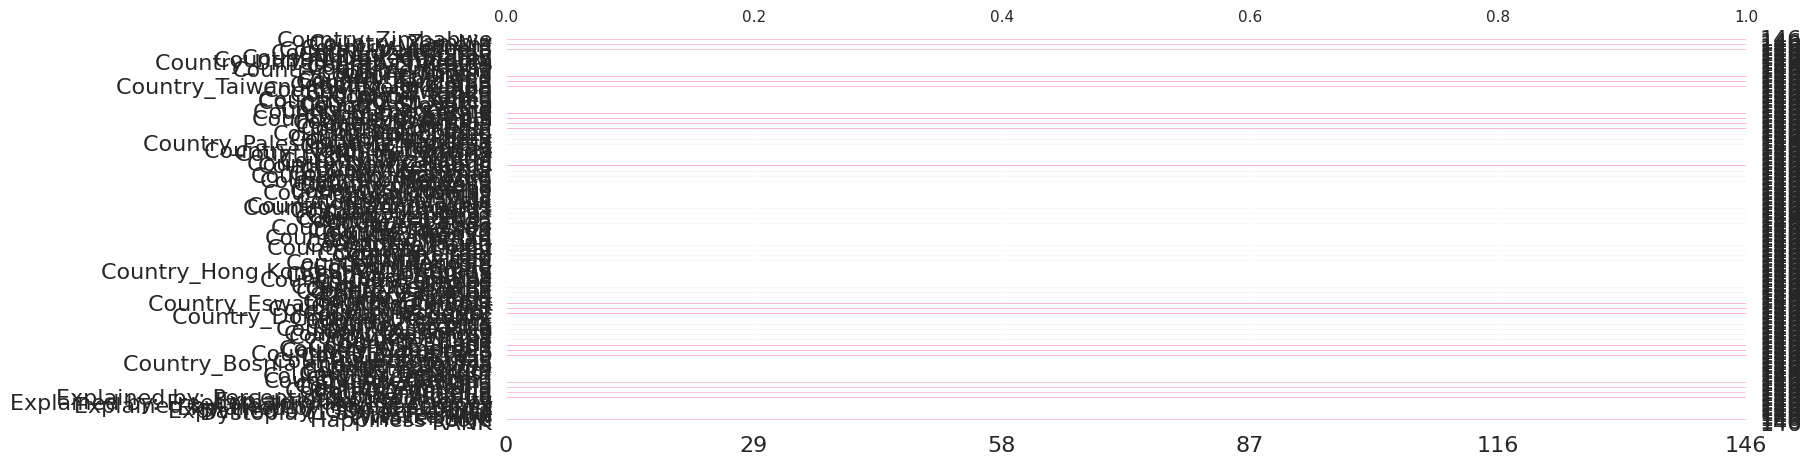

In [37]:
msno.bar(train, figsize = (16,5),color = "#FF69B4")
plt.show()

Great, there is no missing information in the data.

First, we visualize our entire dataset completely, and then we proceed to the analysis of the dependencies we are interested in.

In [38]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7c6c1c62d510> (for post_execute):


ValueError: Image size of 78000x78000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 78000x78000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 78000x78000 with 729 Axes>

As we can see, most features have a positive correlation with the target variable.

Hypothesis: There is multicollinearity in the dataset.

Let's do a quick analysis of the numerical variables and draw some conclusions from it.

In [39]:
train.columns


Index(['RANK', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity',
       ...
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'Country_Uruguay', 'Country_Uzbekistan',
       'Country_Venezuela', 'Country_Vietnam', 'Country_Yemen*',
       'Country_Zambia', 'Country_Zimbabwe'],
      dtype='object', length=156)

In [40]:
numeric_features=['Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption']

In [41]:
fig = make_subplots(rows=len(numeric_features), cols=3)
i=1
for feature in numeric_features:
  fig.add_trace(go.Histogram(x=train[feature], name=feature), row=i, col=1)
  fig.add_trace(go.Box(x=train[feature], name=feature), row=i, col=2)
  fig.add_trace(go.Violin(x=train[feature], name=feature), row=i, col=3)
  i+=1
fig.update_layout(height=2400, width=1800, title_text='<b>Continuos distributions', title_x=0.5)
fig.show()

Hypothesis: Most of the data are not distributed according to the normal distribution law, and there are also minor outliers for each of the features.

Let's visualize the top 5 countries according to our numerical features.

In [43]:
for feature in numeric_features:
  top5 = train.nlargest(5,feature).sort_values(by=feature)
  fig_bar = px.bar(x = top5['Country'], y = top5[feature])
  fig_bar.update_layout(width = 1000, height = 500, title_text=f"TOP 5 country by {feature}")
  fig_bar.update_xaxes(title = 'Country')
  fig_bar.update_yaxes(title = f'{feature}')
  fig_bar.show()

KeyError: 'Country'

Conclusions: mainly developed countries from the European Union are in the lead.

We visualize the relationship of the target feature with the rest of the numerical features.

In [44]:
for feature in numeric_features:  
  fig = px.scatter(train, x='Happiness score',y=feature)
  fig.update_layout(title=f"Scatter plot Happiness score with {feature}")
  fig.show()

Hypothesis: Happiness score and Whisker signs are multicollinear.

We visualize our indicators on the map.

In [45]:
train.columns

Index(['RANK', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity',
       ...
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'Country_Uruguay', 'Country_Uzbekistan',
       'Country_Venezuela', 'Country_Vietnam', 'Country_Yemen*',
       'Country_Zambia', 'Country_Zimbabwe'],
      dtype='object', length=156)

In [46]:
for feature in numeric_features:
  data = dict(type='choropleth',
  locations = train['Country'],
  locationmode = 'country names', z = train[feature],
  text = train['Country'], colorbar = {'title':f'{feature}'},
  colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
  reversescale = False)
  layout = dict(title=f'Visualization of the parameter {feature} on the map',geo = dict(showframe = True))
  choromap = go.Figure(data = [data], layout = layout)
  iplot(choromap, validate=False)

KeyError: 'Country'

Well, here we see that in most cases in developed countries the standard of living is very high in various indicators. Let's move on to mini-statistical tests.
 Since our target feature is numeric and continuous, and the dependent features are also continuous, then it will be enough to build a correlation matrix.

In [47]:
from sklearn import ensemble, tree, linear_model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [48]:
y=train['Happiness score']
x=train.drop(['Happiness score'],axis=1)

In [50]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=42)


In [51]:
df_models = pd.DataFrame(data=None, columns=['Algorithm', 'MSE', 'MAE'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str): 
    model.fit(X_tr, y_tr)
    y_pred=model.predict(X_te)
    MSE=mean_squared_error(y_te,y_pred)
    MAE=mean_absolute_error(y_te, y_pred)
    df_models.loc[len(df_models.index)] = [model_name, MSE, MAE]

In [52]:
models = [RandomForestRegressor(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor()]


In [53]:
for model in models:
    make_model(X_train, X_test, y_train, y_test, model, f'{model}'[:10])


In [54]:
fig = go.Figure(data=[
    go.Bar(name='MSE', x=df_models.Algorithm, y=df_models.MSE),
    go.Bar(name='MAE', x=df_models.Algorithm, y=df_models.MAE)
])
fig.update_layout(height=900, width=1400,title='MAE and MSE for different models', title_x=0.5)

In [55]:
!pip install optuna
import optuna

In [57]:
def objective(trial,data=x,target=y):
    train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.1,random_state=42)

    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    mse = mean_squared_error(test_y, preds)
    
    return mse

In [58]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of final trial:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2025-01-13 16:41:14,720] A new study created in memory with name: no-name-479d1d9b-3fd1-4d34-bc17-bc8a791a80fe
<ipython-input-57-850f4b44e643>:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-57-850f4b44e643>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

[I 2025-01-13 16:41:14,986] Trial 0 finished with value: 1.1558379173055011 and parameters: {'lambda': 0.8198205197325407, 'alpha': 0.0199379932920394, 'colsa

Number of final trial: 30
Best trial: {'lambda': 0.0010883018197083145, 'alpha': 0.002751906816130817, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 4}


In [59]:
from optuna import visualization
print('Best trial: MSE= {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))
hist = study.trials_dataframe()
hist.head()

Best trial: MSE= 0.0013445369852005571,
params {'lambda': 0.0010883018197083145, 'alpha': 0.002751906816130817, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 4}


,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,1.155838,2025-01-13 16:41:14.722511,2025-01-13 16:41:14.985322,0 days 00:00:00.262811,0.019938,0.3,0.819821,0.016,7,199,2020,0.7,COMPLETE
1,1,1.155838,2025-01-13 16:41:14.987305,2025-01-13 16:41:15.227011,0 days 00:00:00.239706,0.006053,0.9,0.015327,0.008,17,106,2020,0.6,COMPLETE
2,2,1.155838,2025-01-13 16:41:15.228813,2025-01-13 16:41:15.475542,0 days 00:00:00.246729,1.103534,0.5,0.074635,0.018,9,151,2020,0.8,COMPLETE
3,3,1.155838,2025-01-13 16:41:15.477381,2025-01-13 16:41:15.715104,0 days 00:00:00.237723,0.005810,0.6,2.253658,0.014,17,209,2020,0.6,COMPLETE
4,4,0.004285,2025-01-13 16:41:15.716914,2025-01-13 16:41:16.602463,0 days 00:00:00.885549,0.004501,0.8,0.011039,0.016,9,2,2020,1.0,COMPLETE


In [60]:
optuna.visualization.plot_slice(study)

In [61]:
optuna.visualization.plot_optimization_history(study)

In [62]:
optuna.visualization.plot_parallel_coordinate(study)

In [63]:
optuna.visualization.plot_param_importances(study)

In [64]:
train1=pd.read_csv('/kaggle/input/world2/World_Happiness_Report_2022_Encoded.csv')

In [65]:
train1=train1.drop(['RANK'],axis=1)

In [66]:
from sklearn.cluster import KMeans

In [67]:
train1=train1.drop('Country',axis=1)

KeyError: "['Country'] not found in axis"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

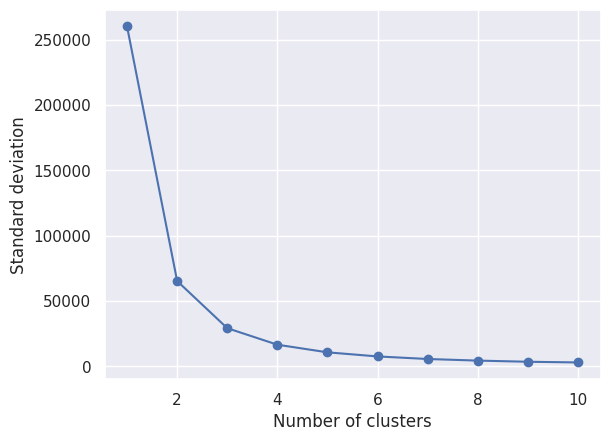

In [68]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(train)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss,'-o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Standard deviation')

plt.show()

In [69]:
X = train1.iloc[:,:].values
km = KMeans(n_clusters =4)
y_means = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



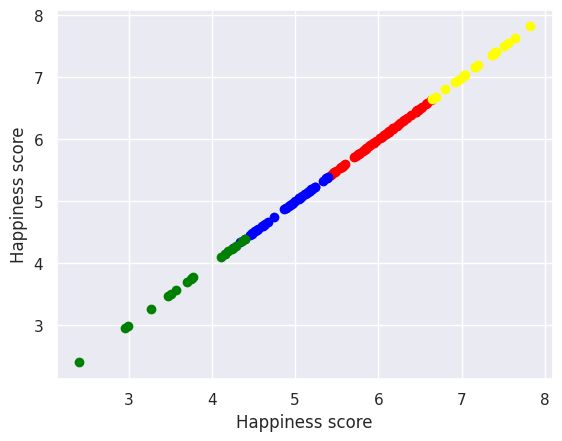

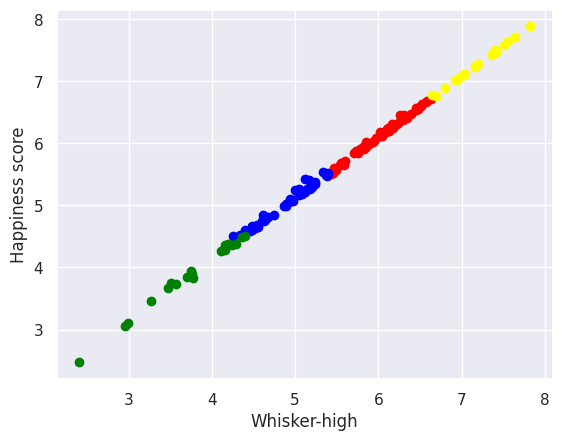

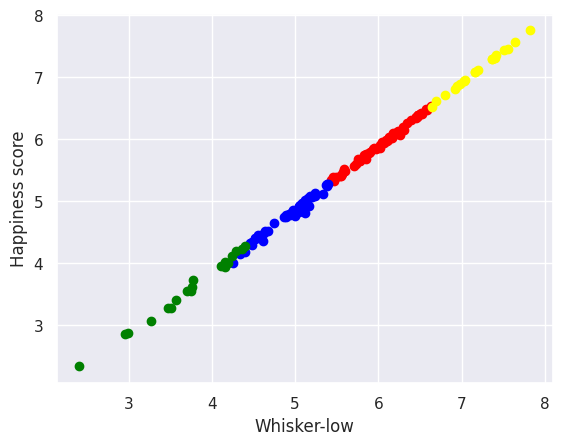

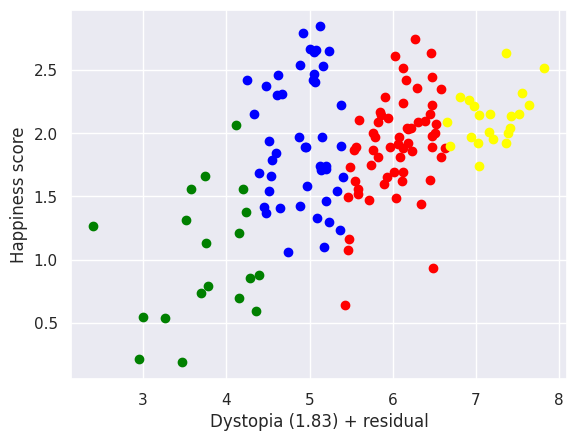

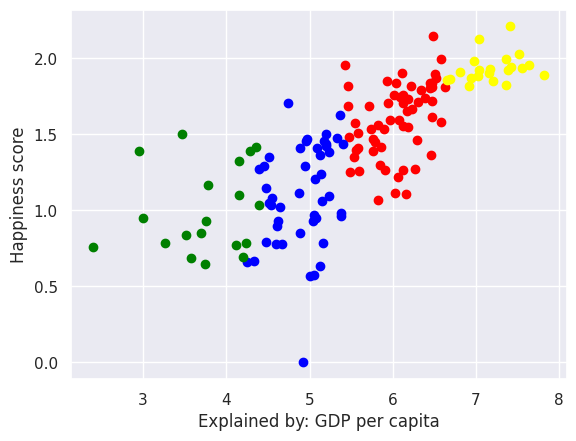

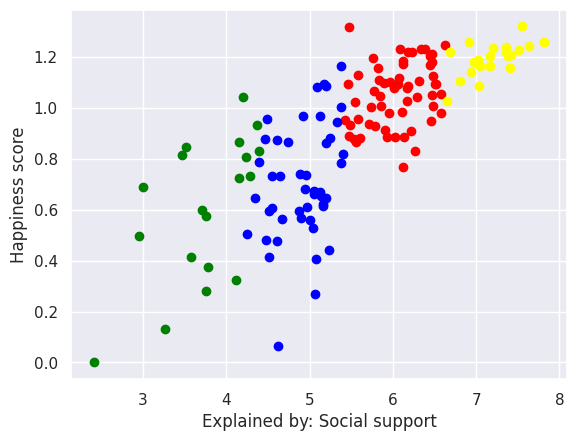

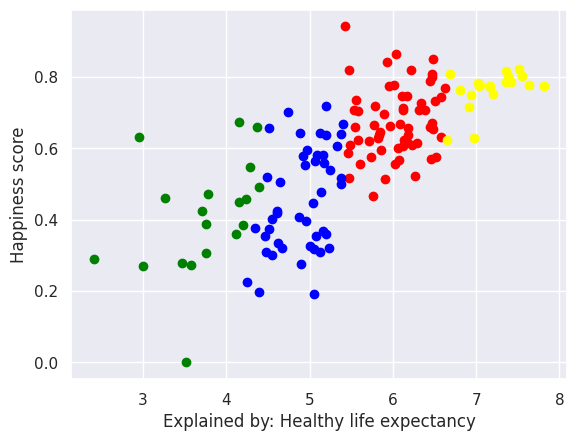

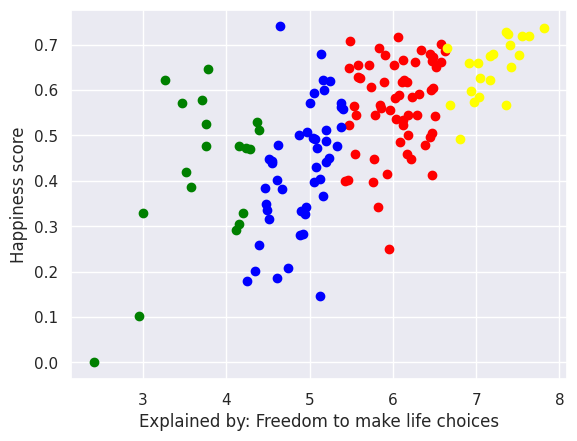

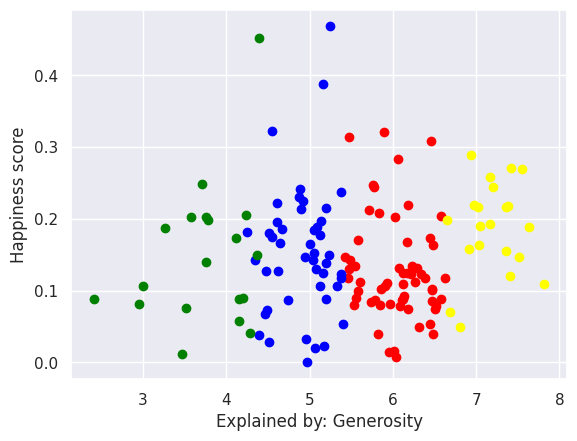

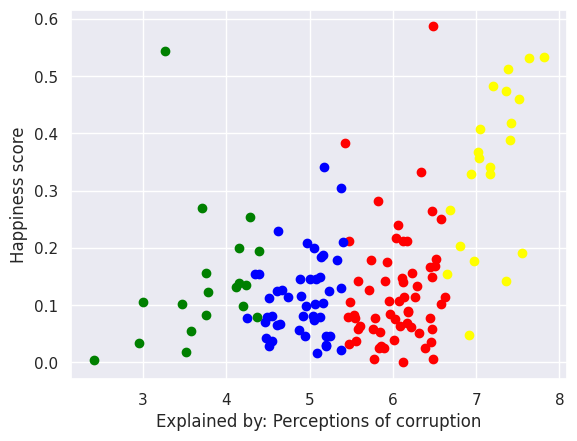

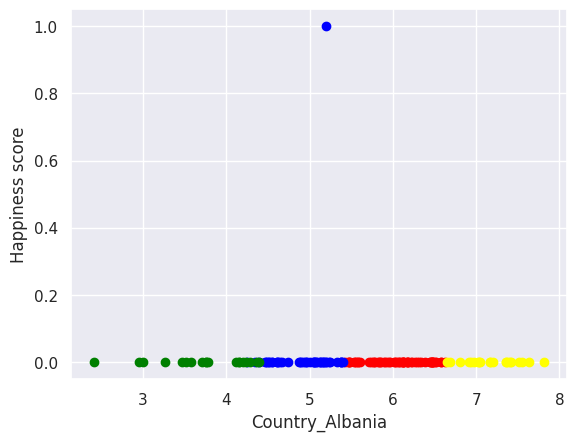

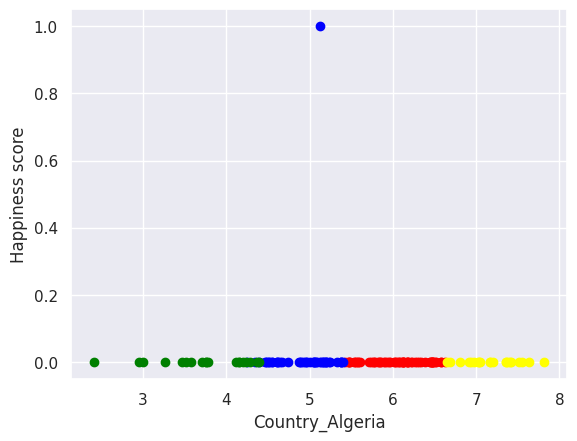

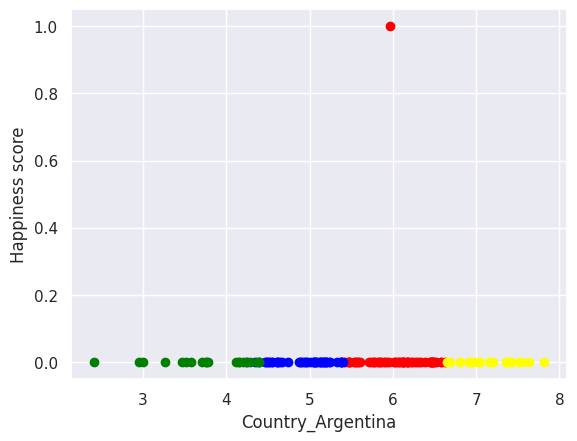

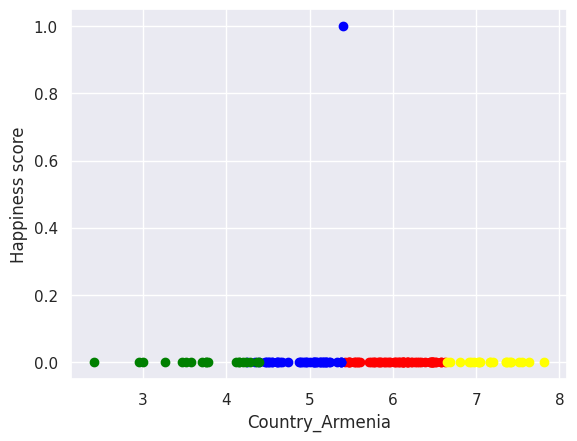

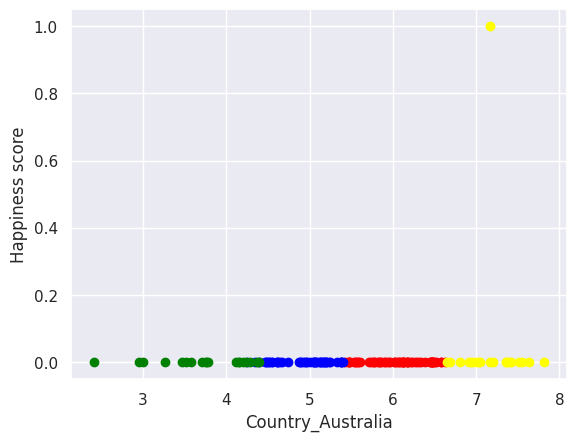

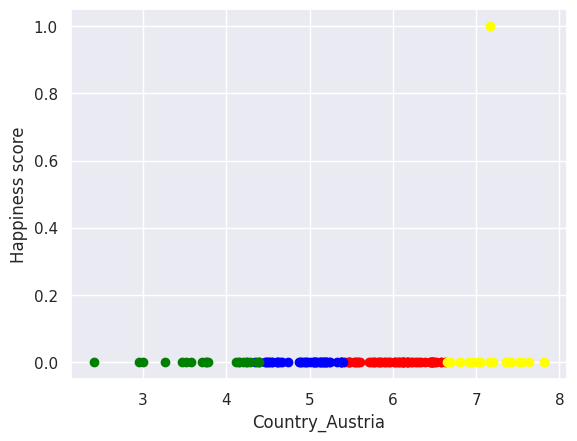

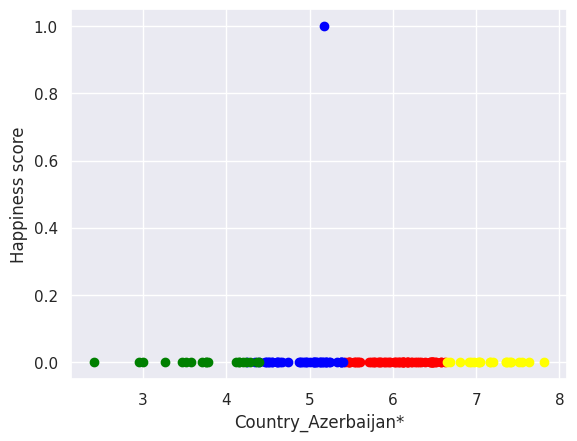

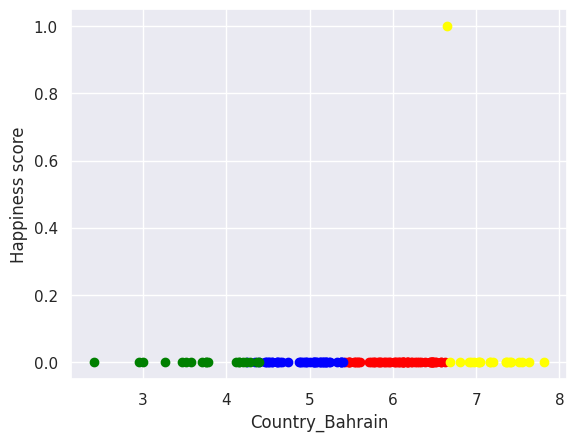

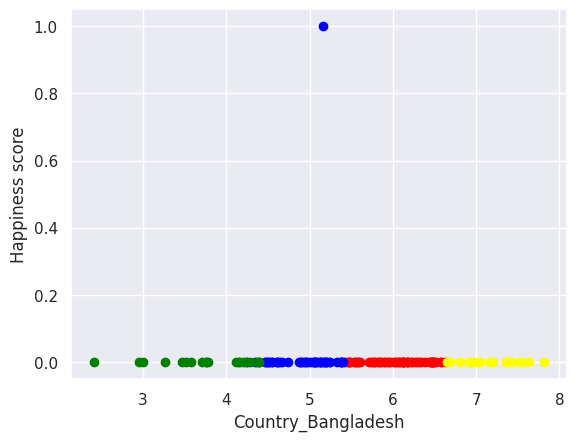

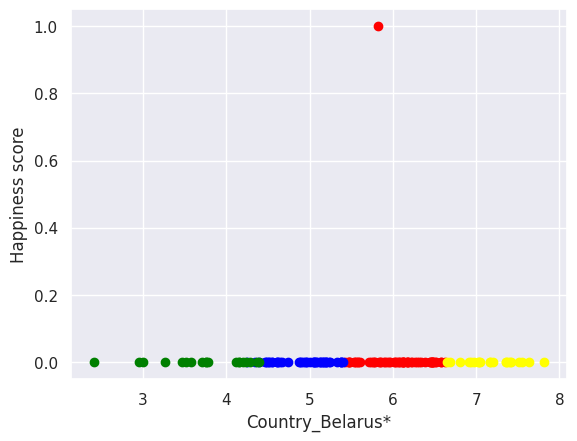

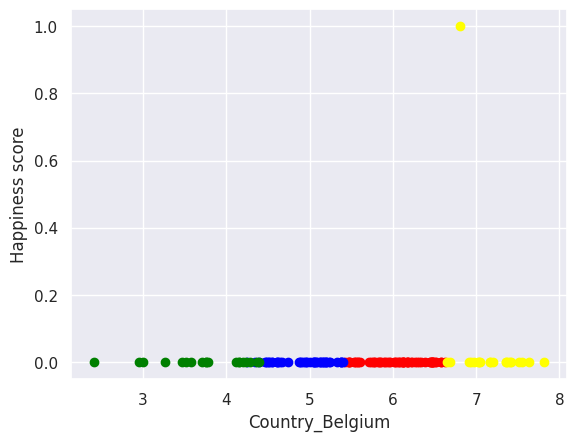

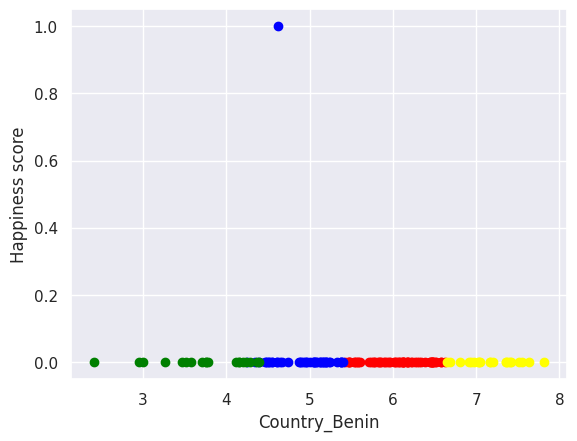

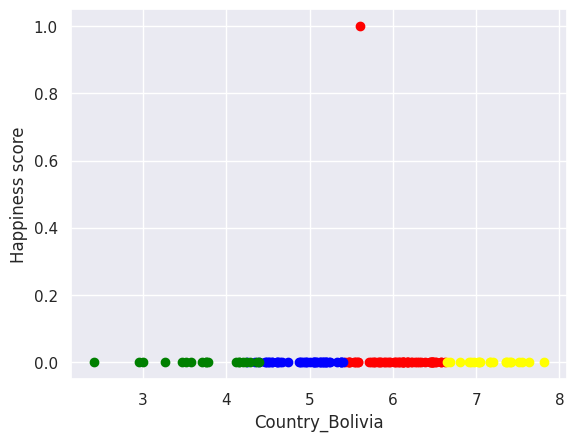

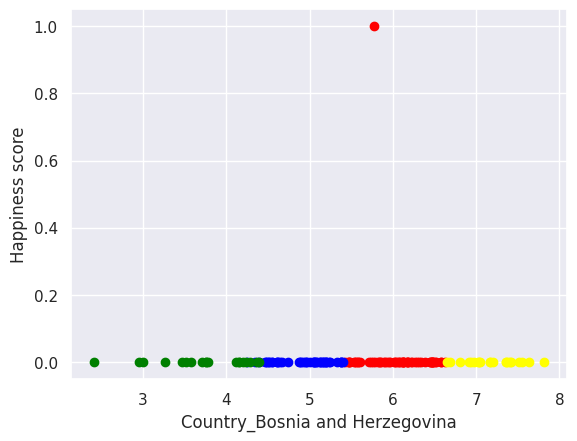

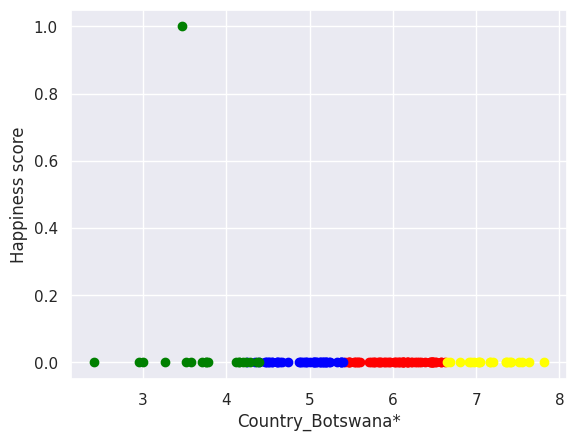

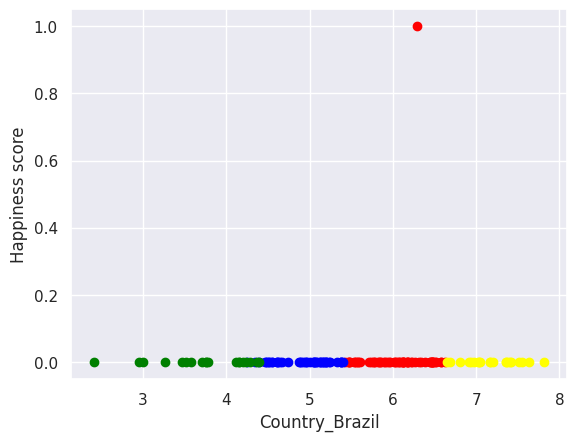

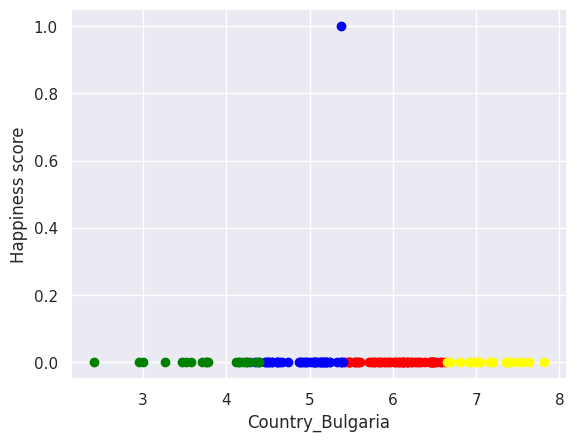

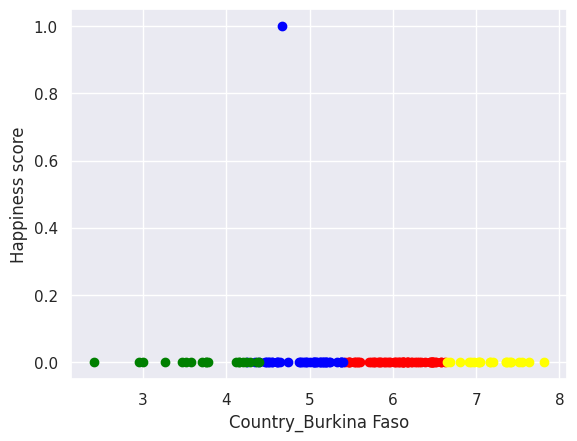

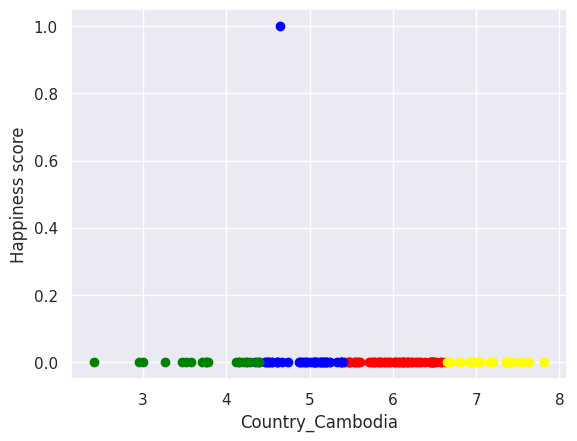

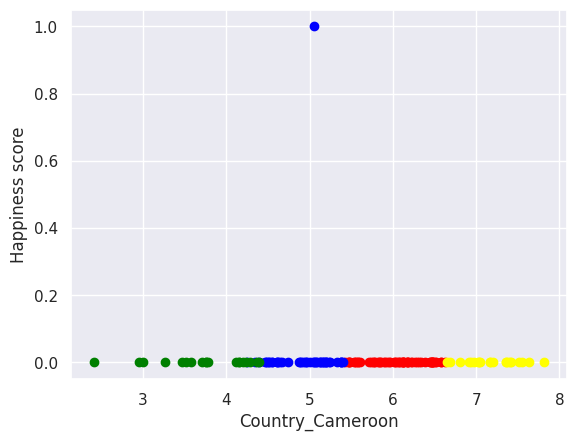

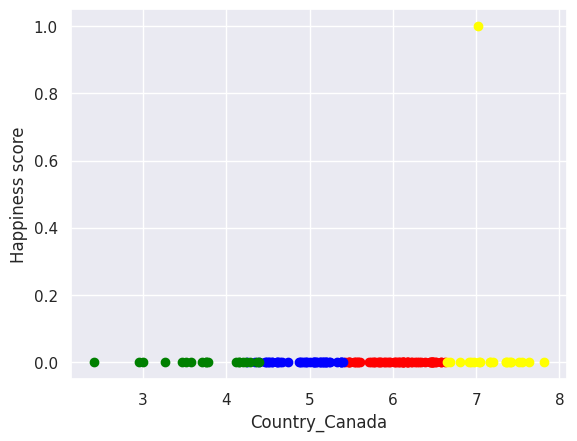

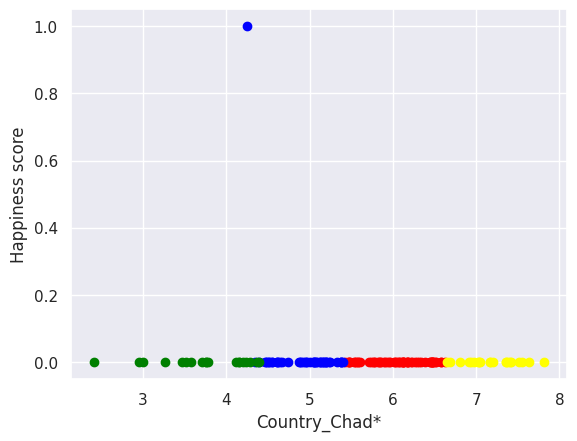

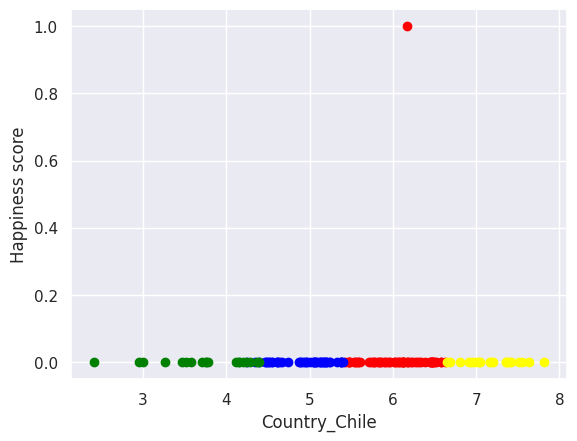

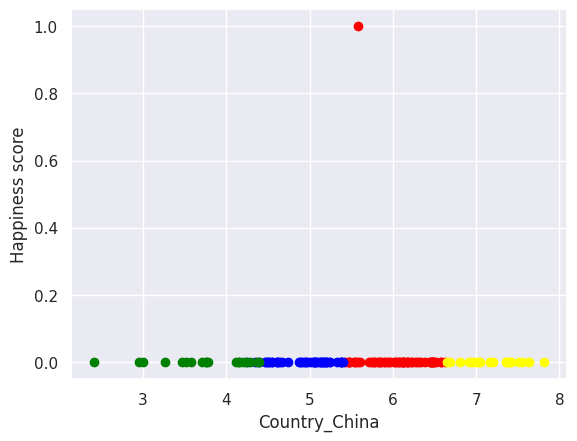

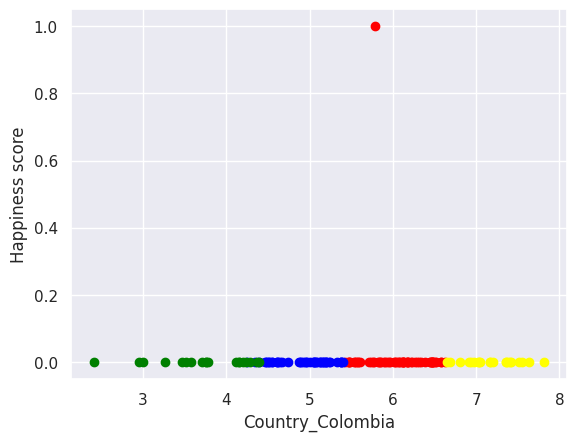

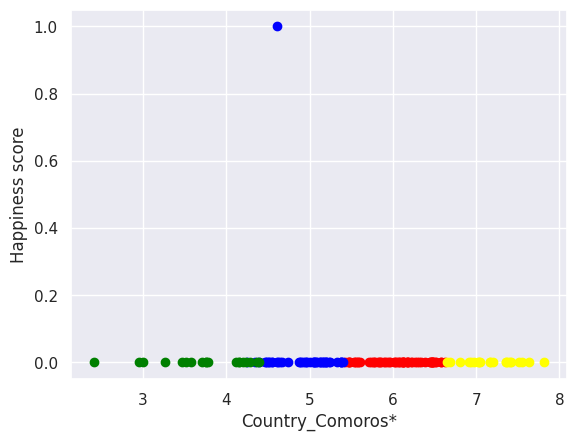

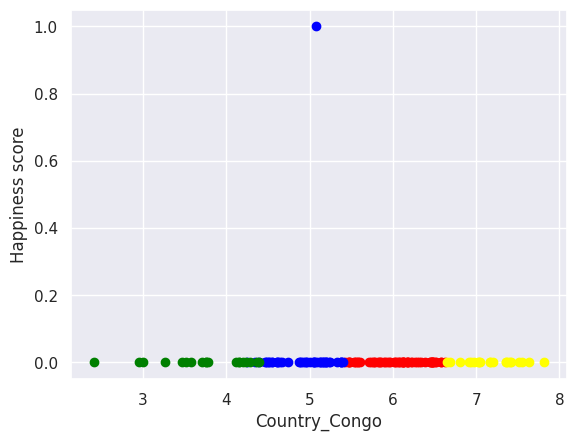

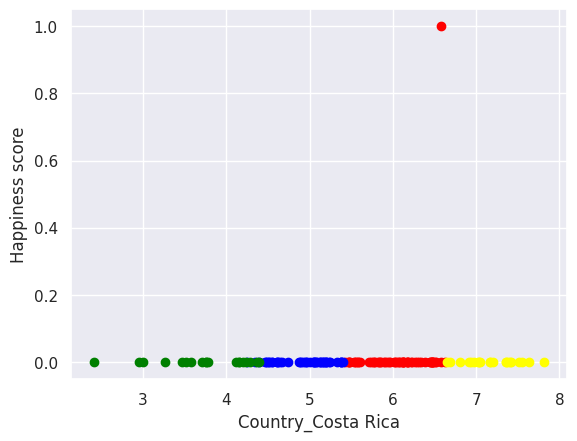

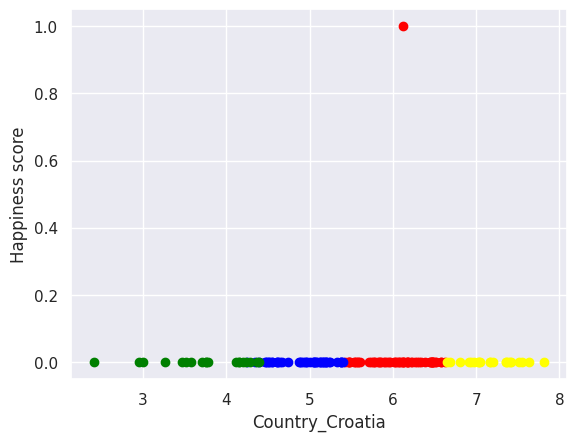

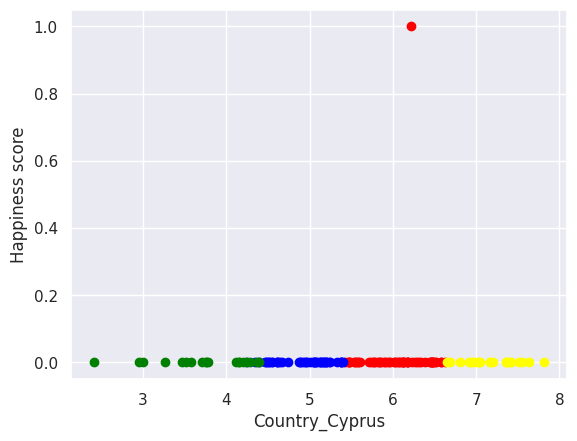

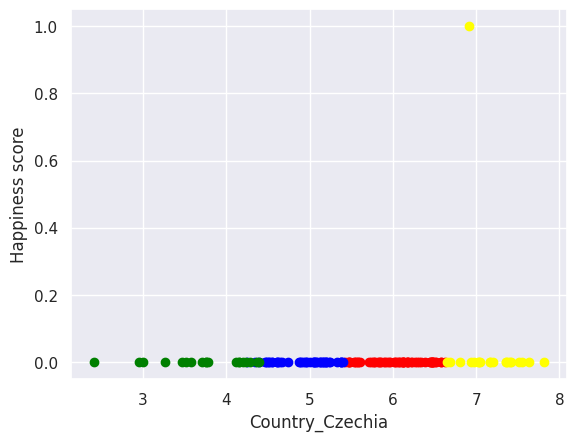

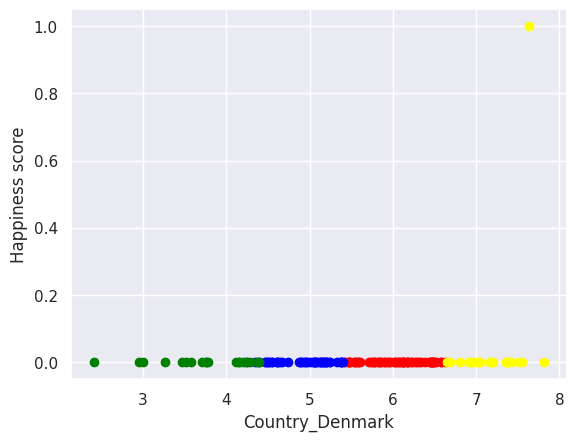

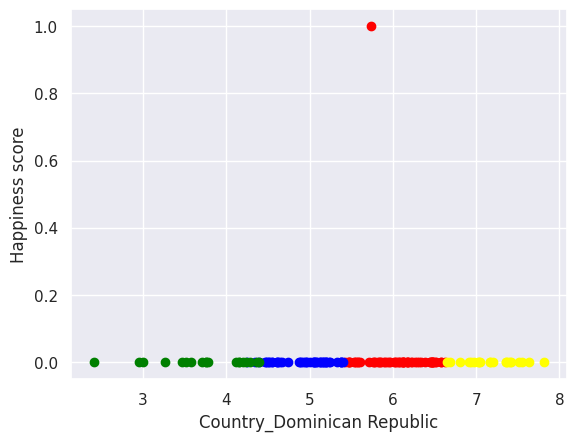

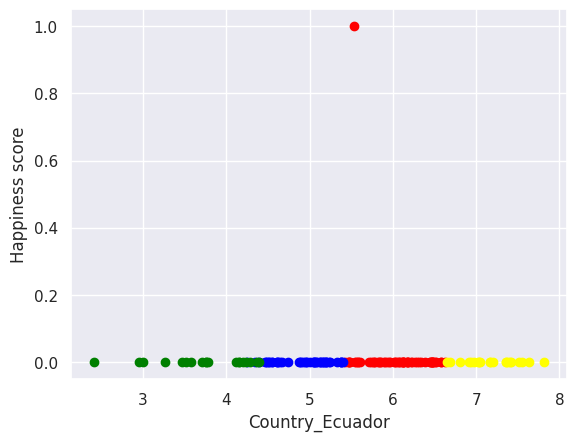

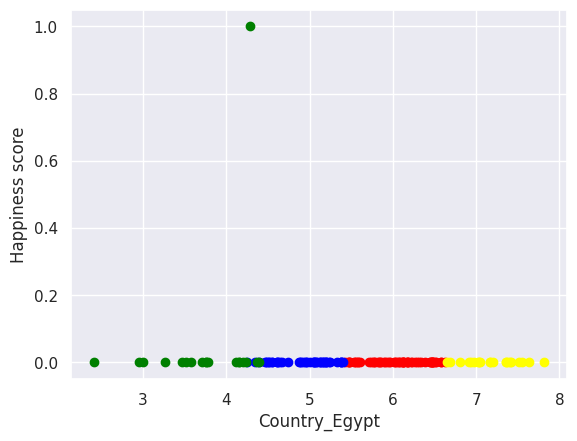

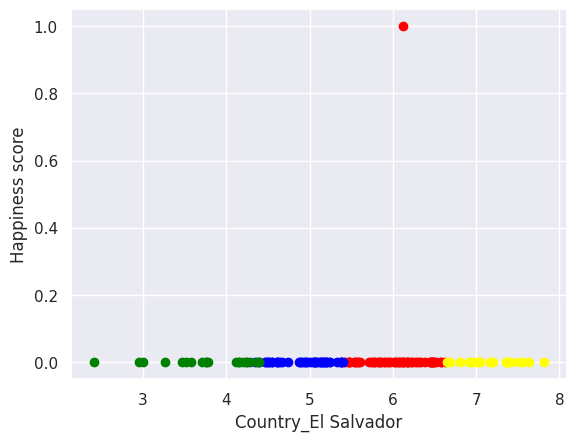

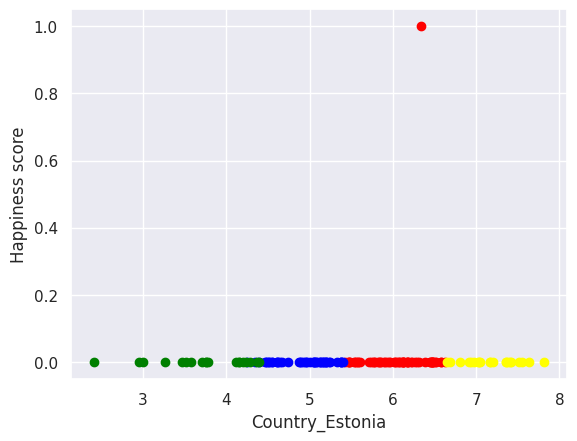

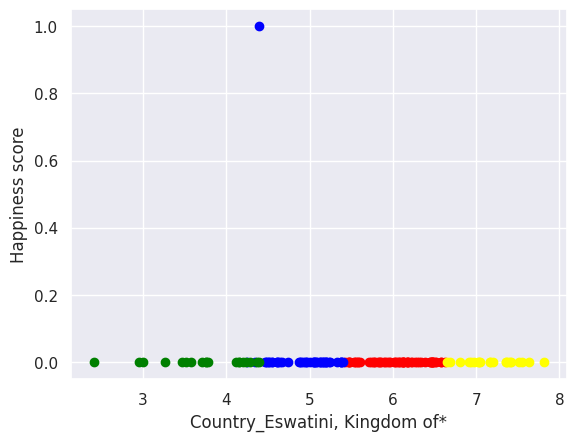

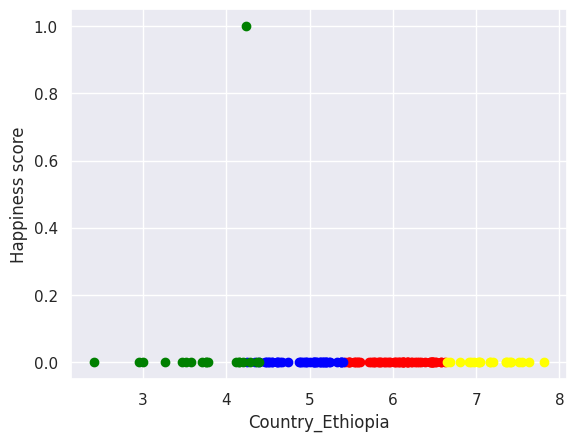

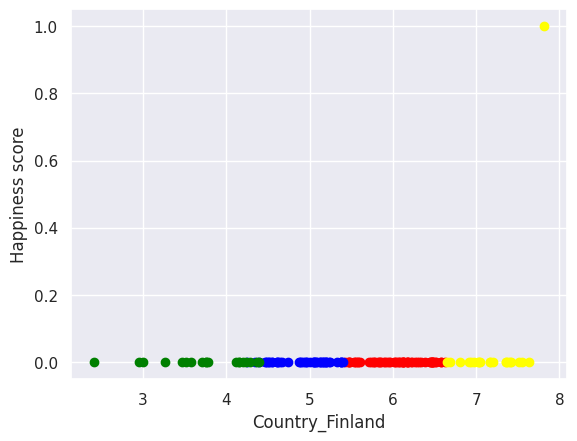

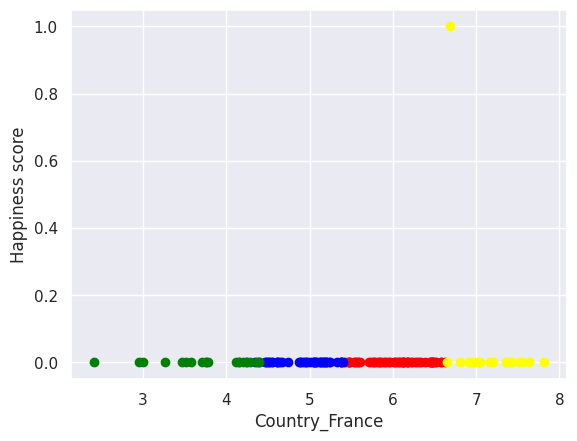

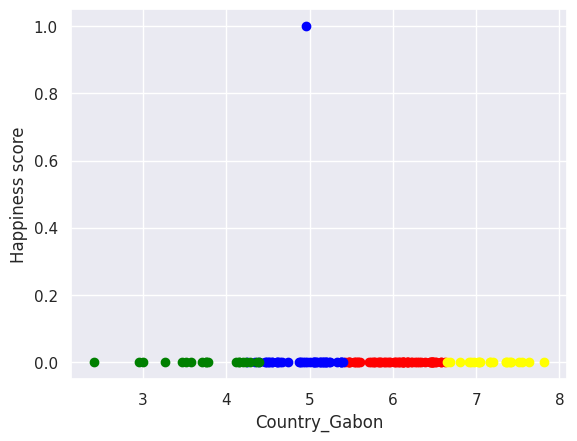

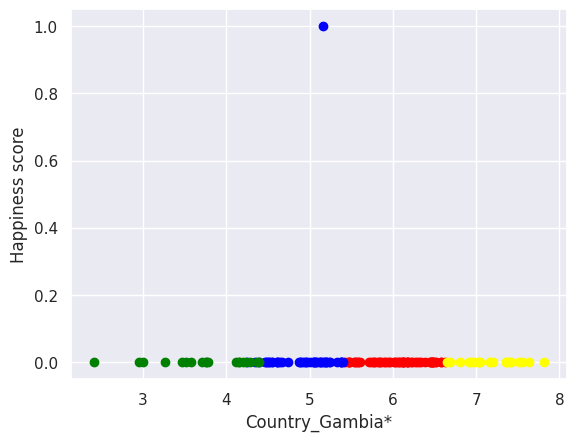

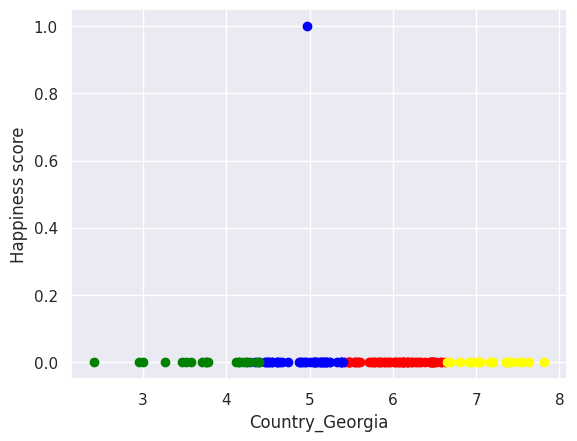

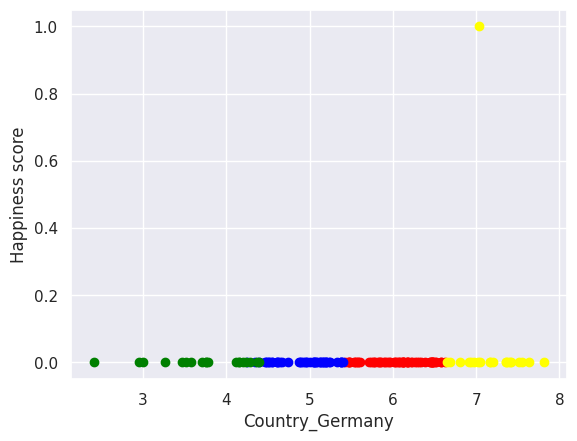

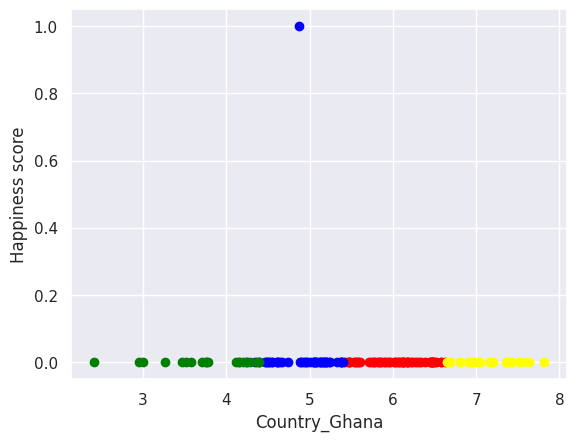

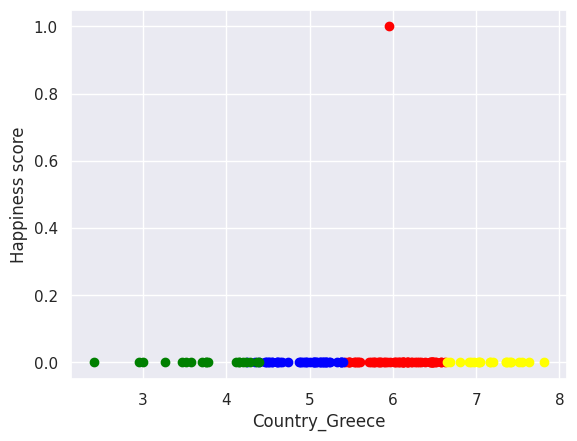

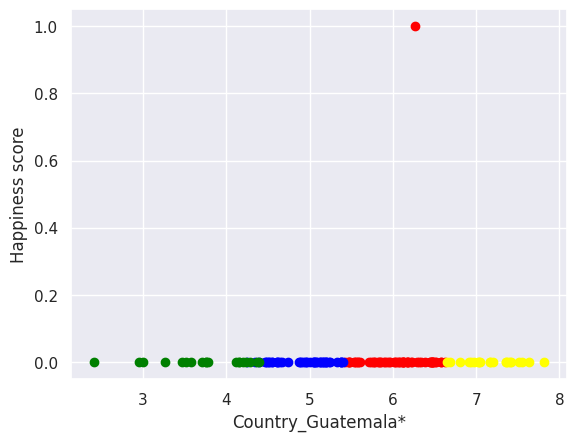

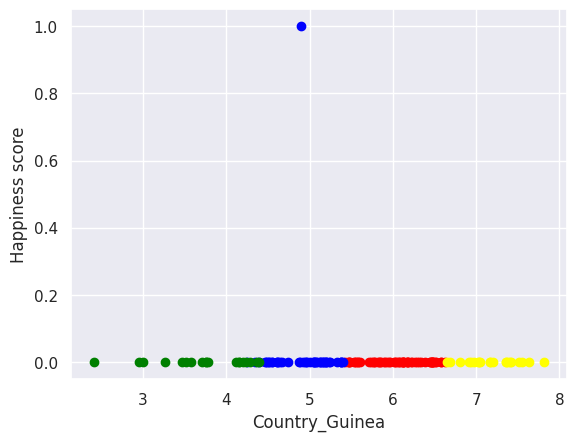

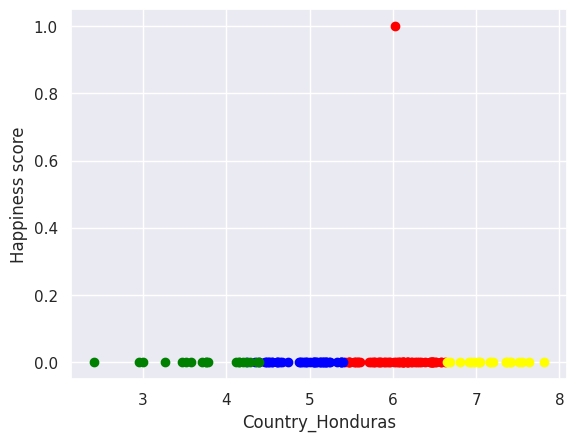

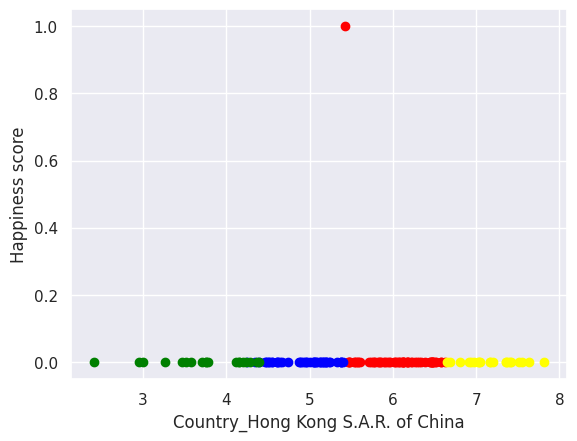

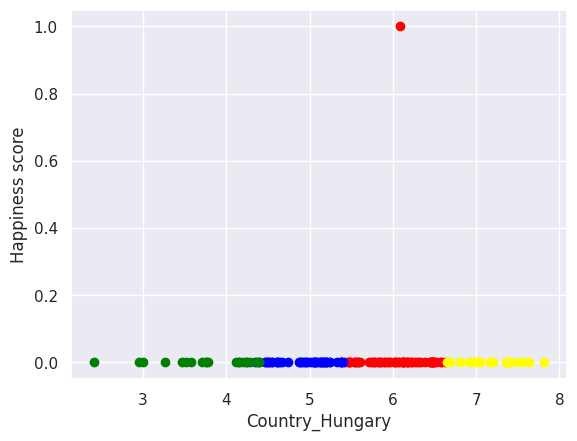

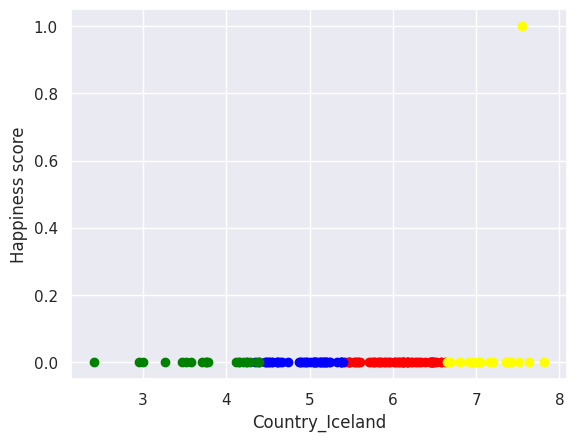

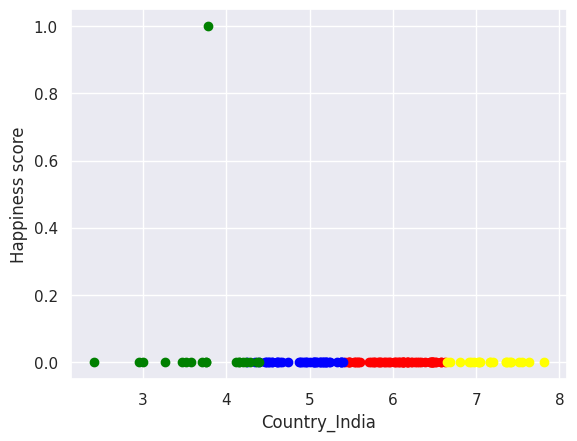

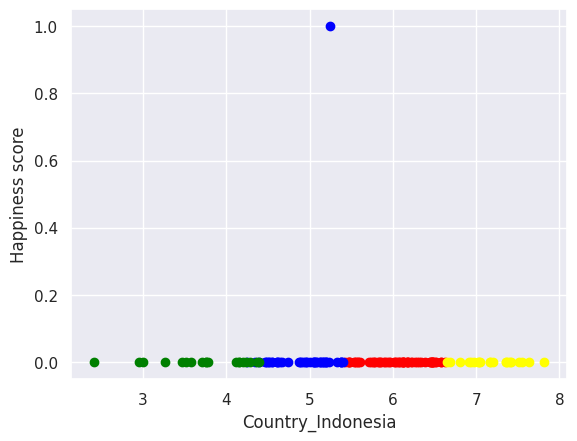

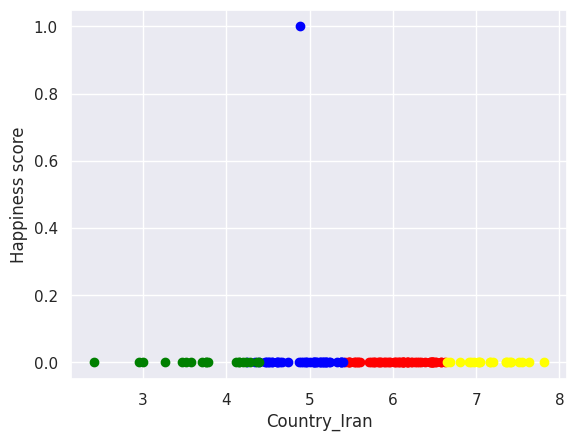

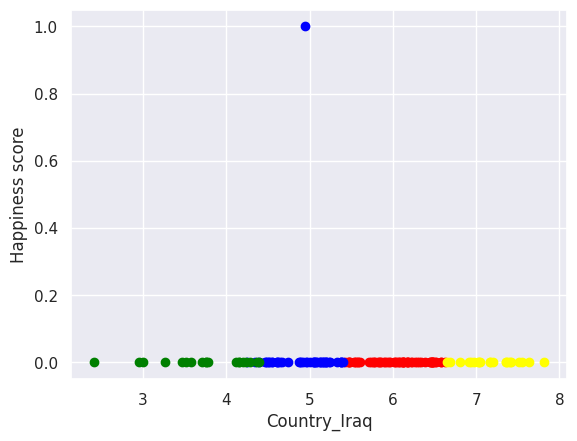

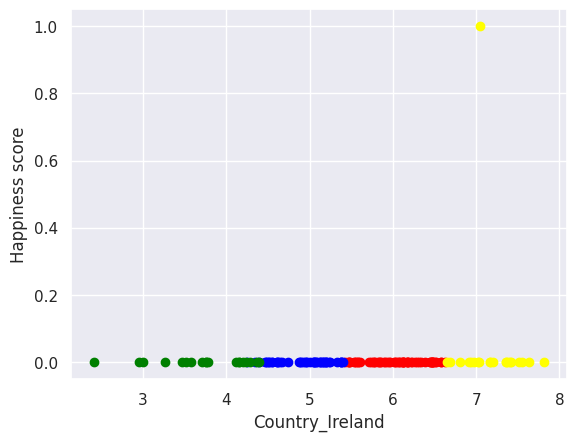

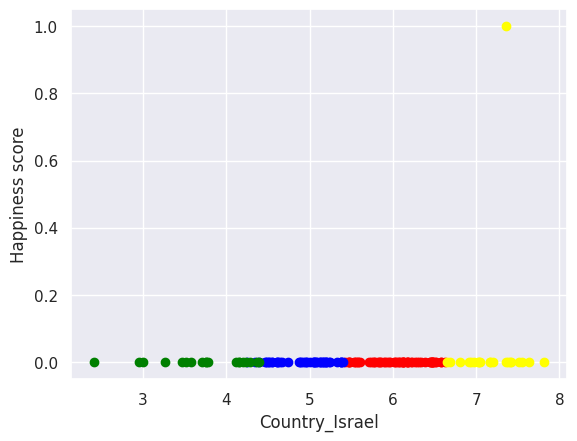

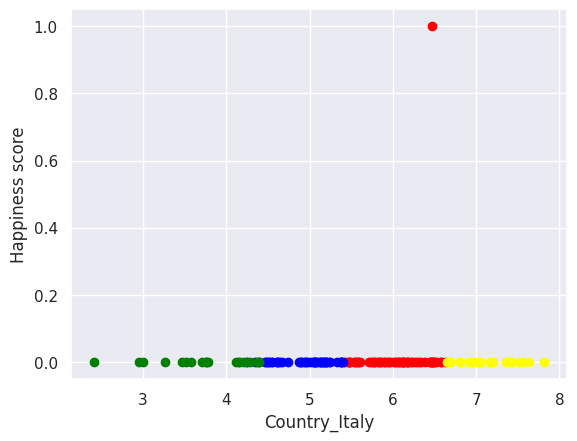

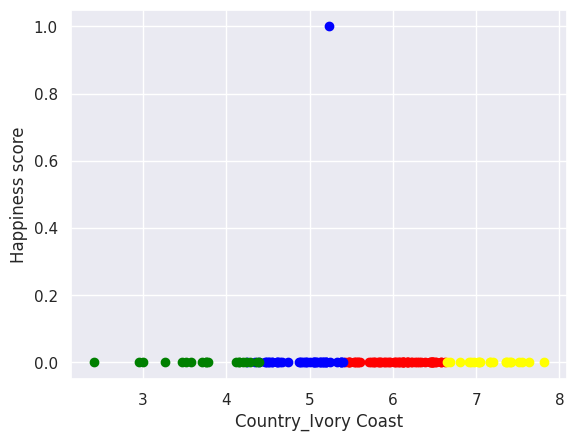

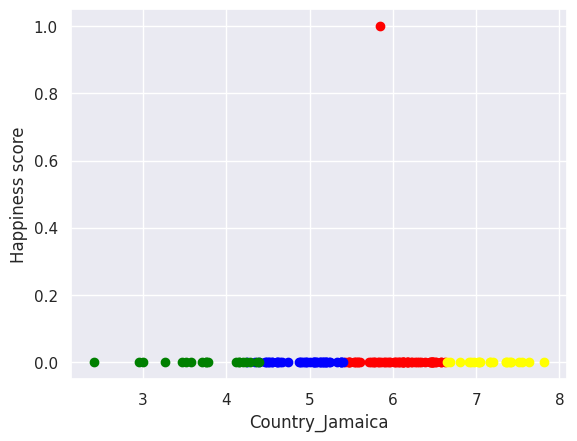

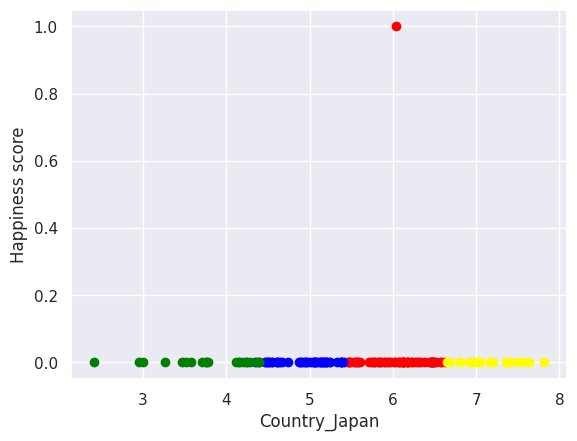

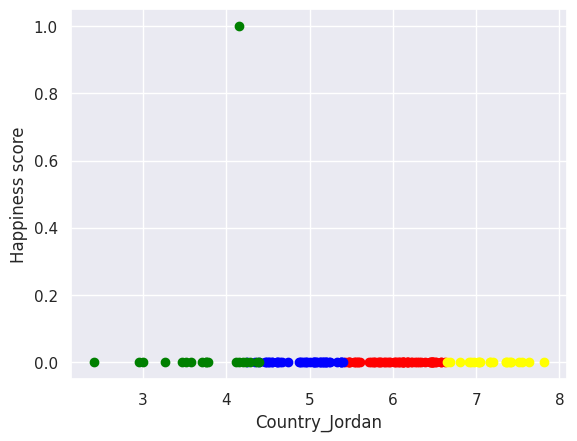

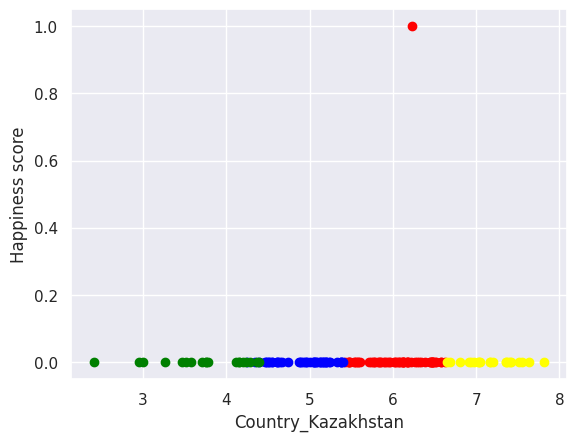

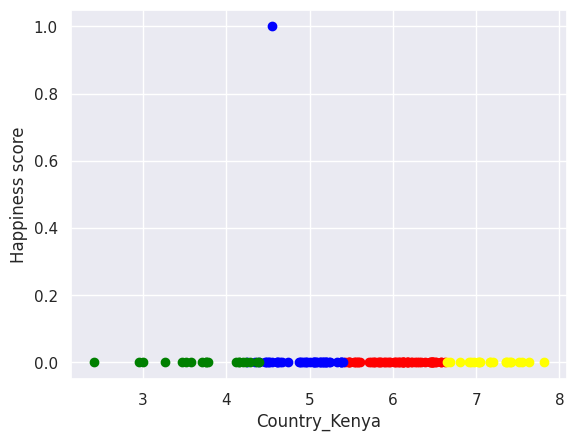

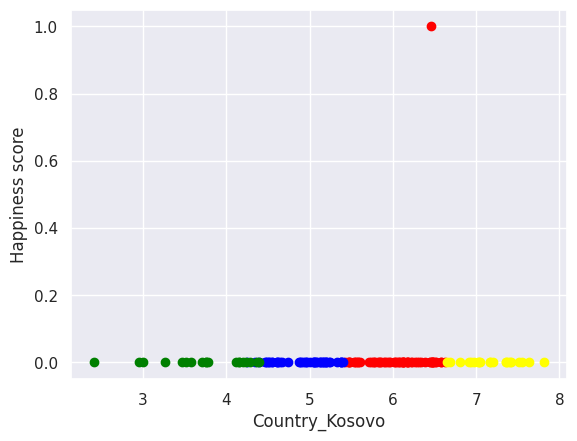

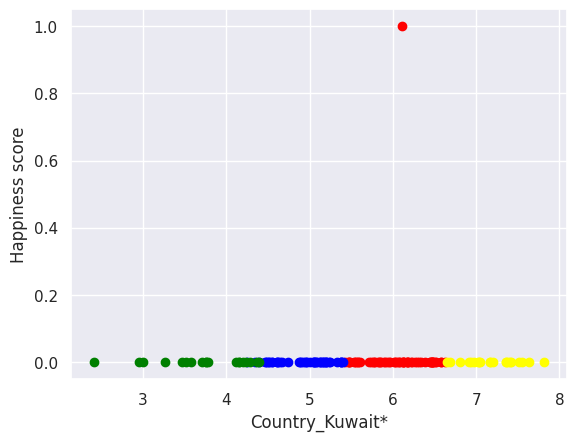

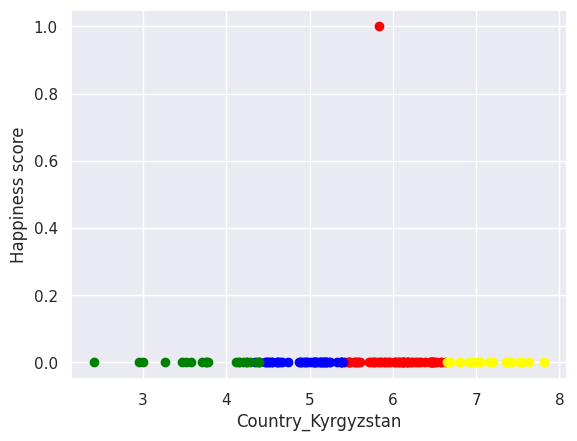

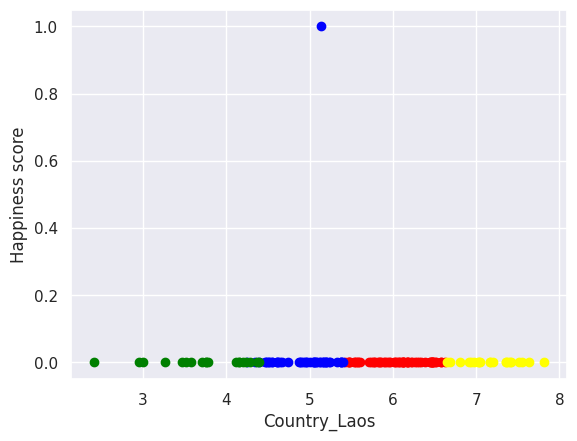

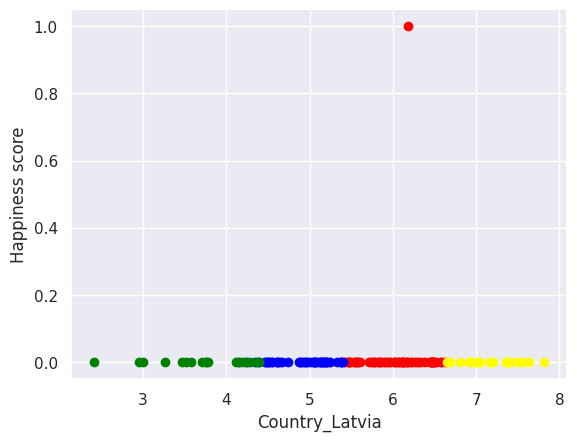

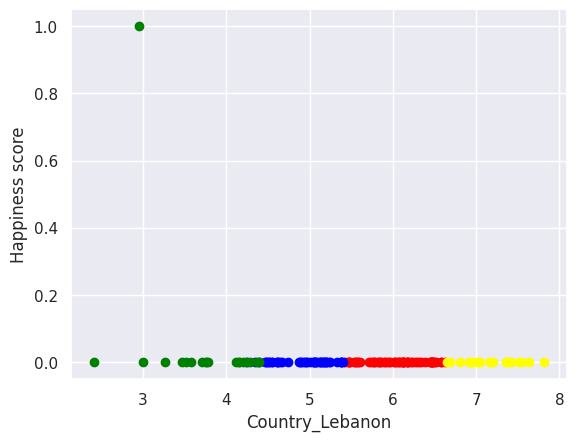

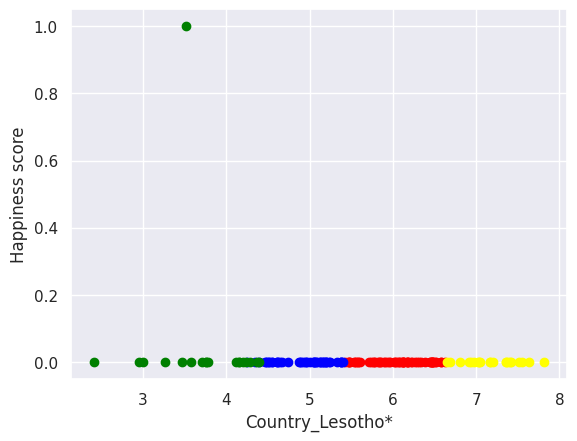

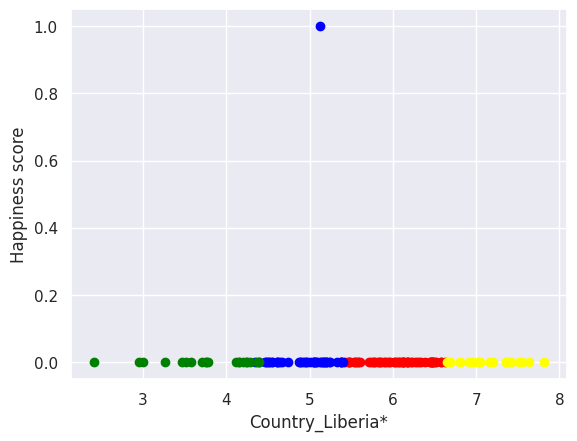

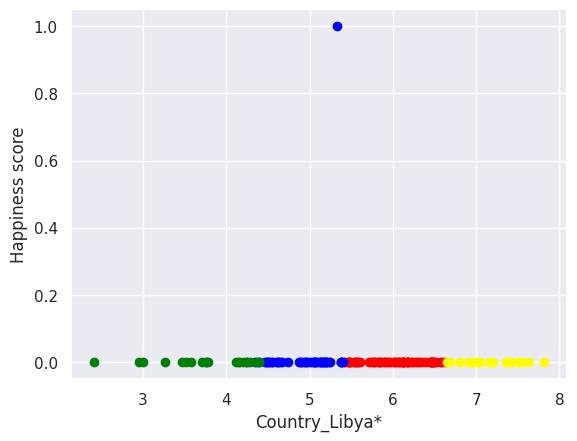

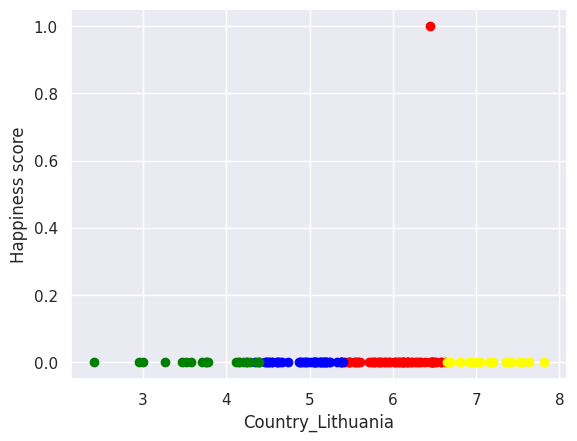

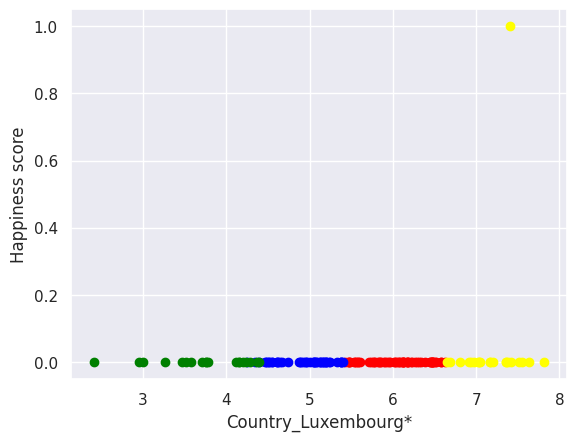

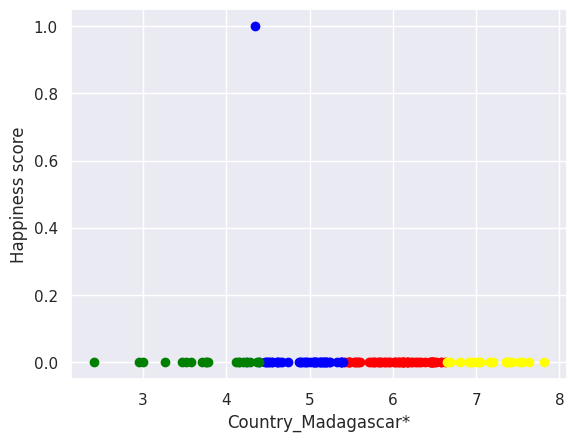

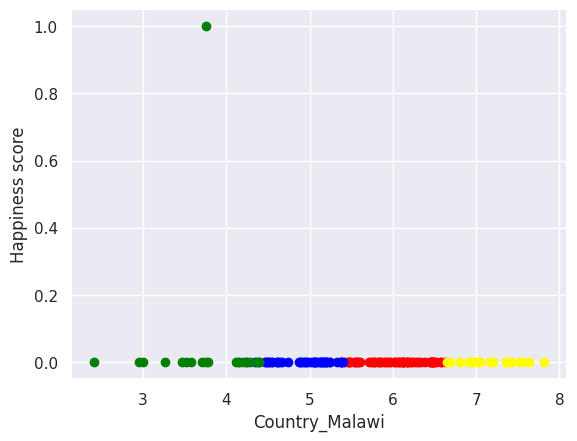

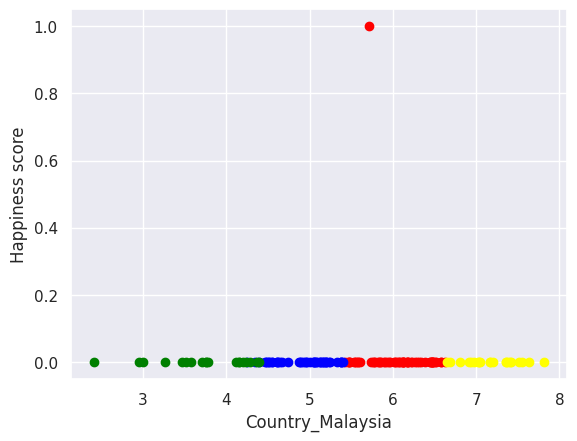

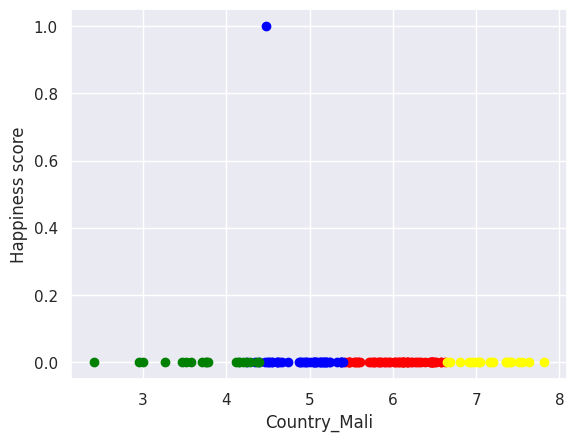

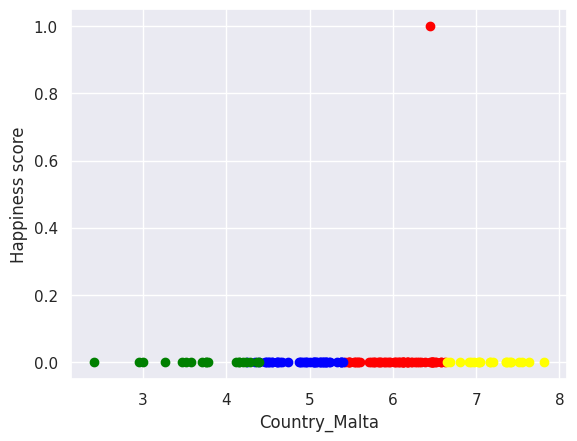

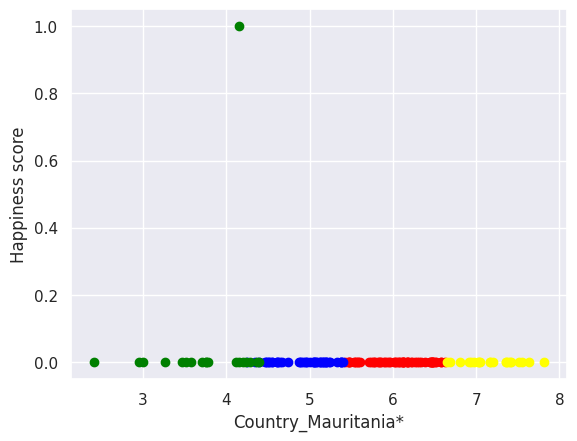

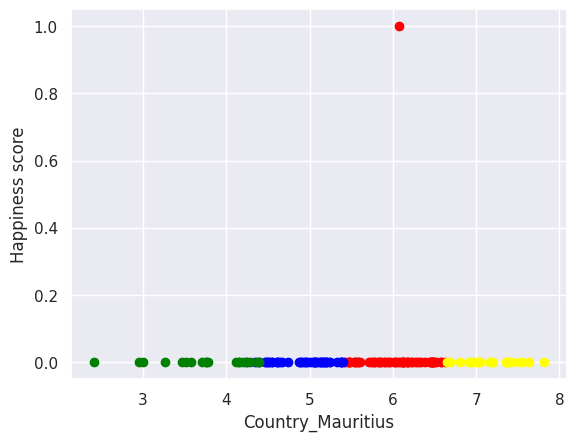

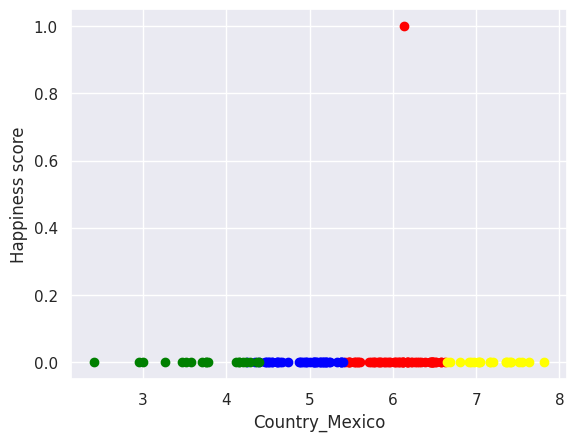

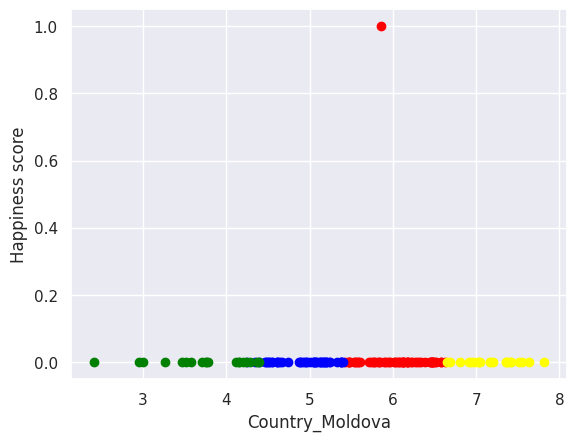

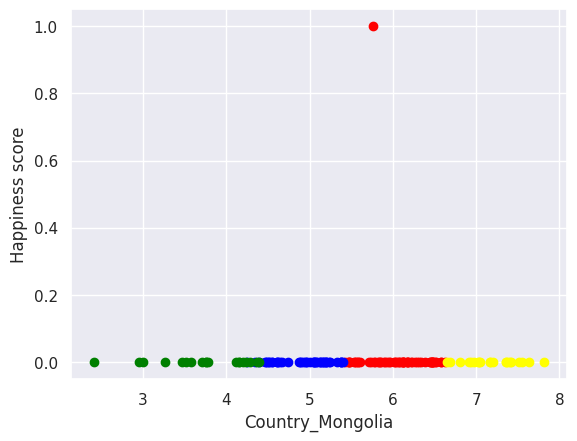

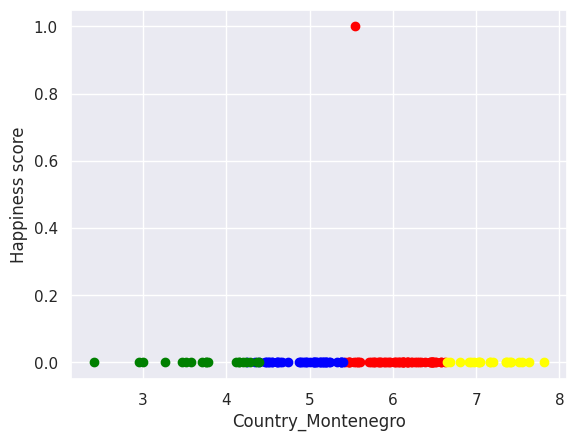

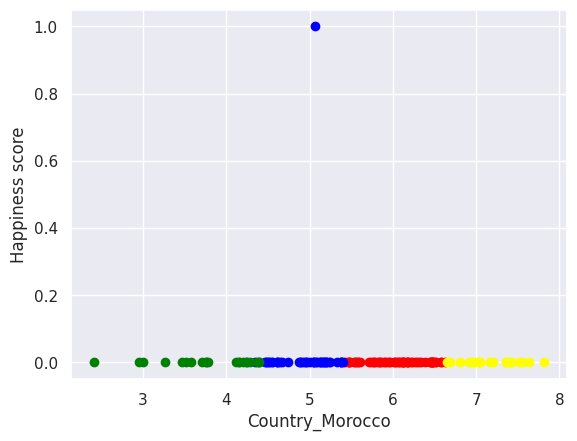

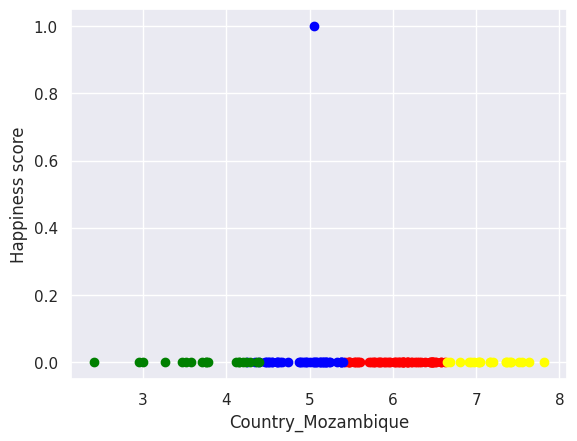

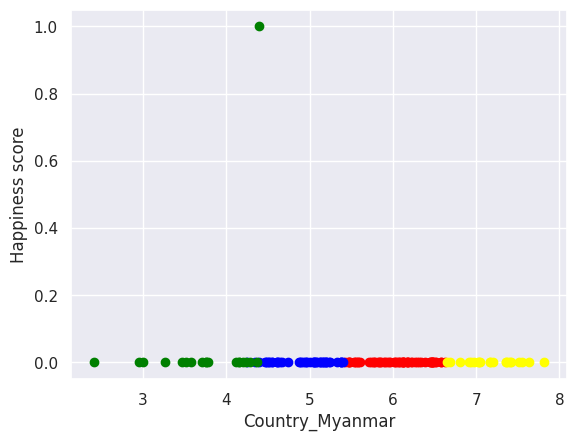

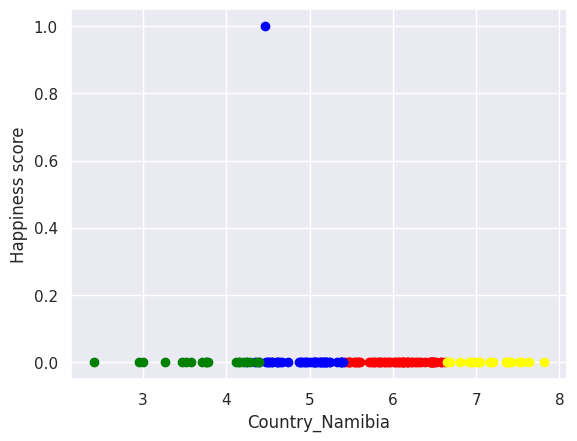

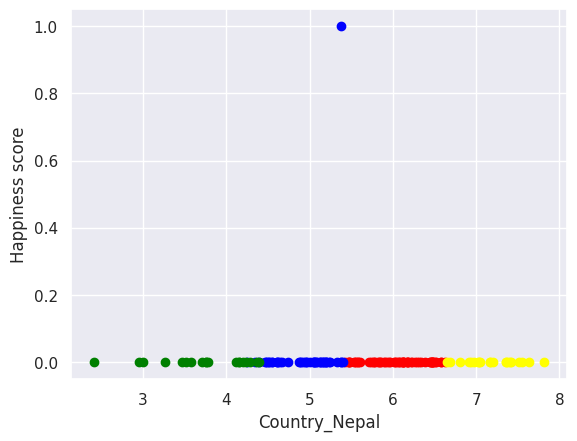

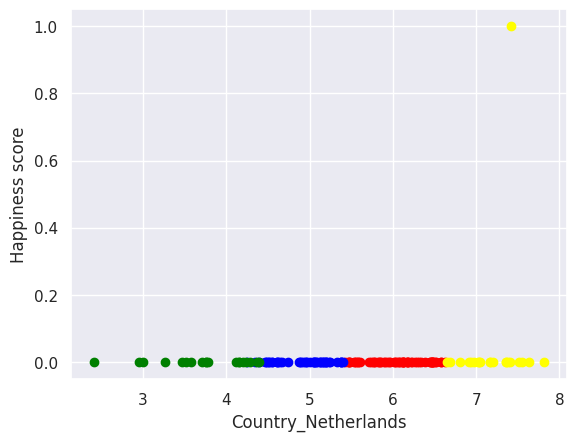

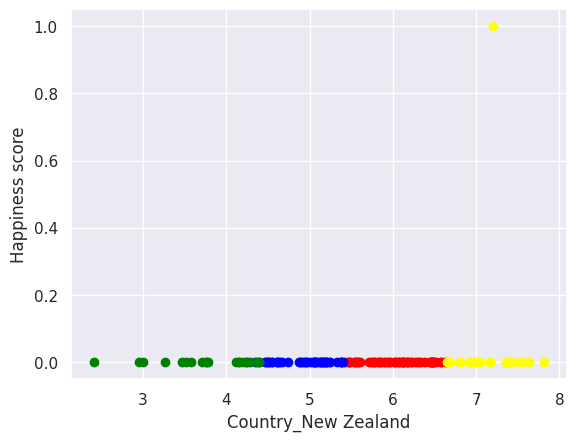

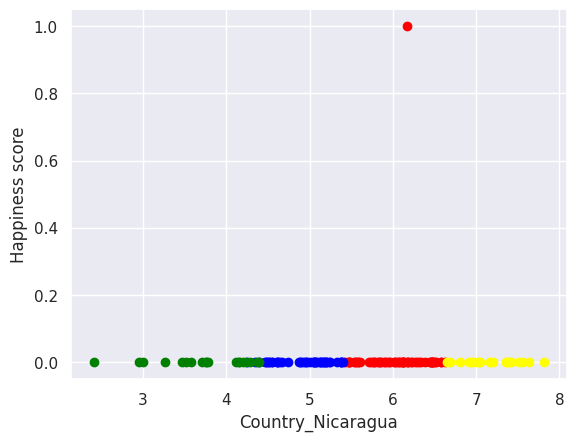

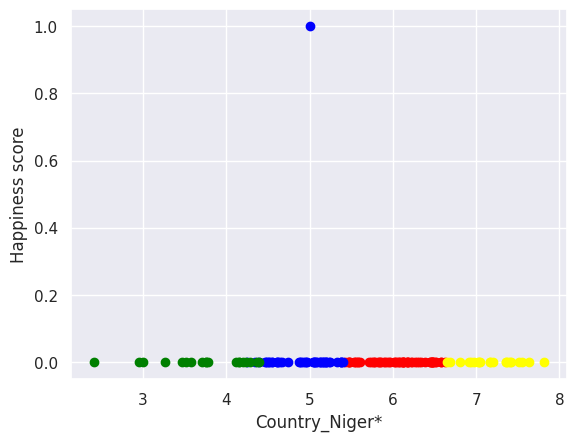

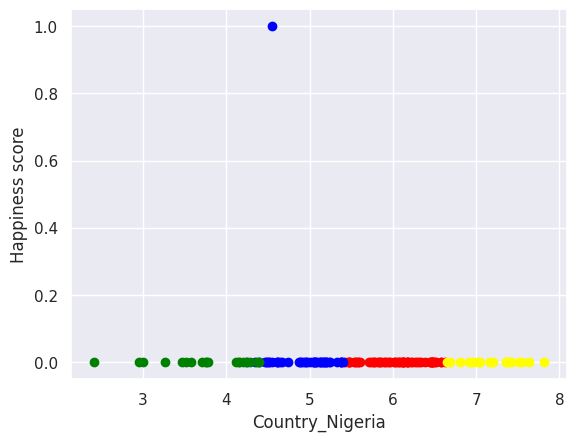

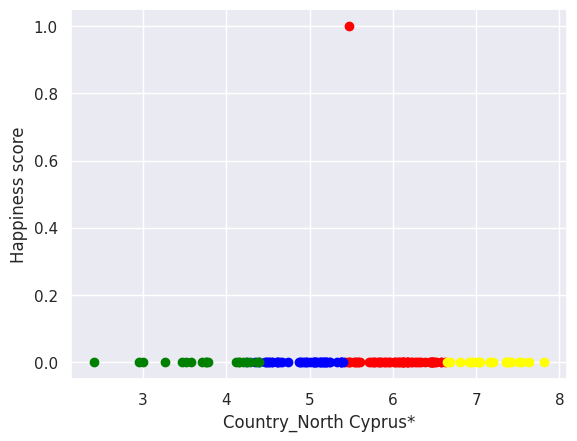

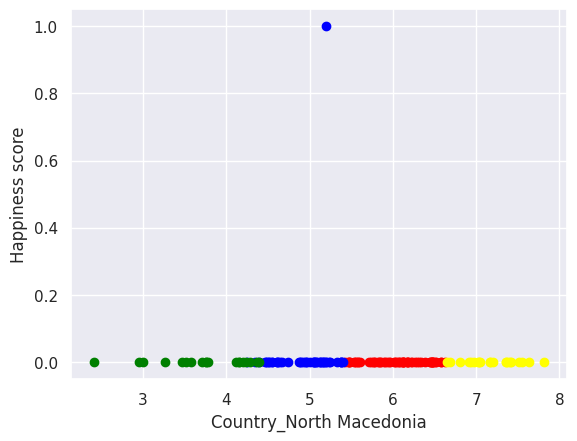

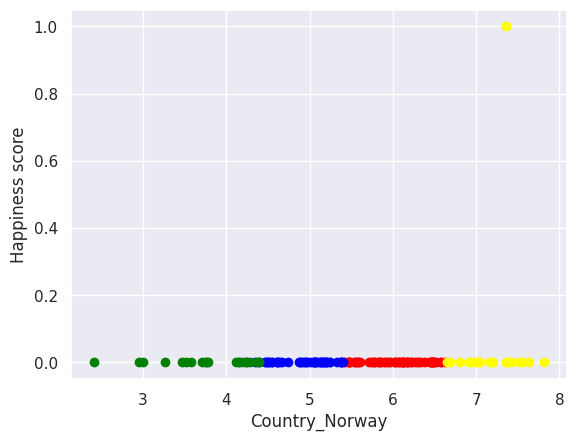

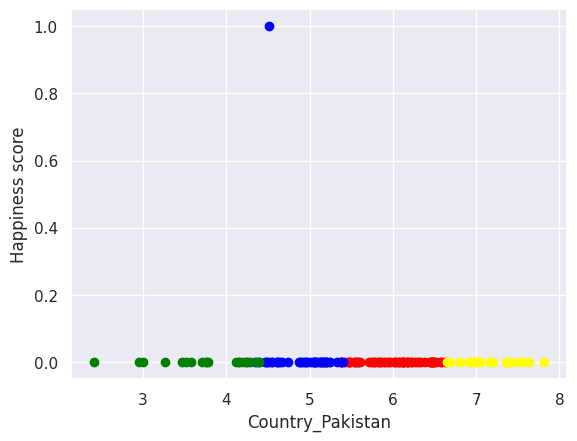

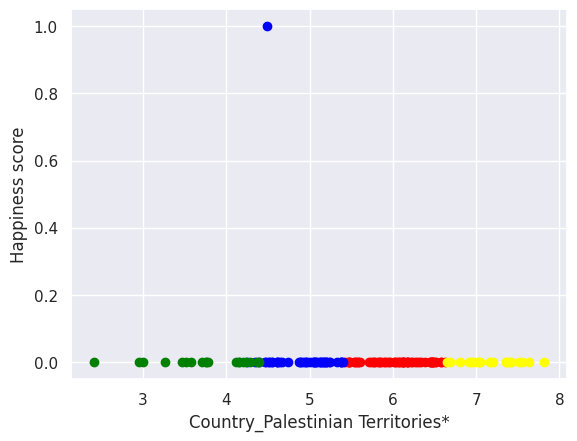

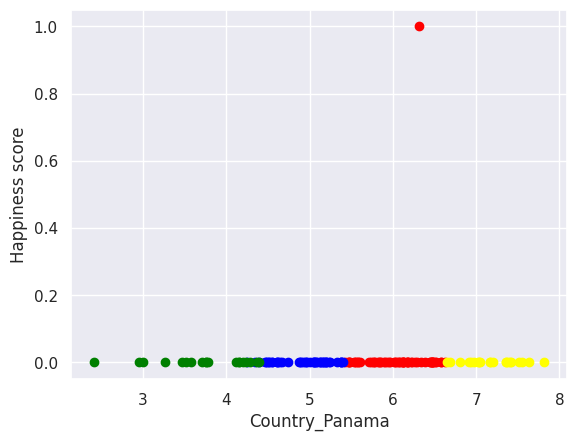

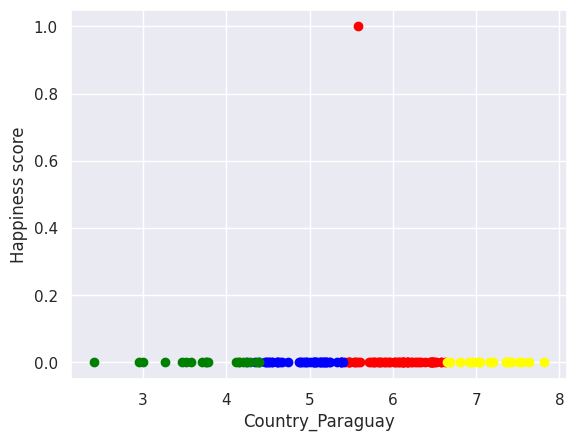

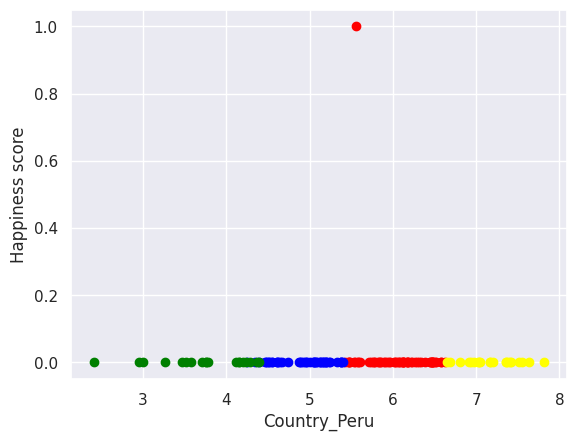

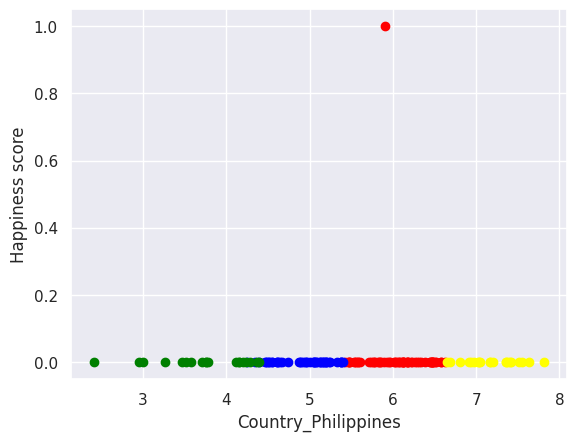

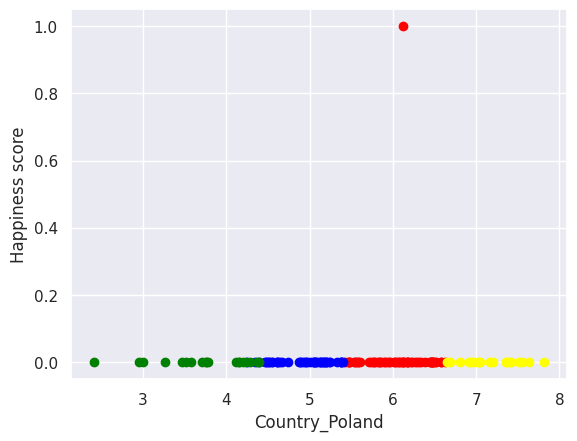

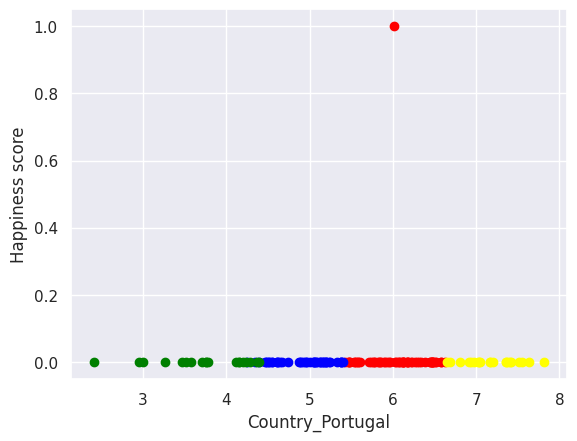

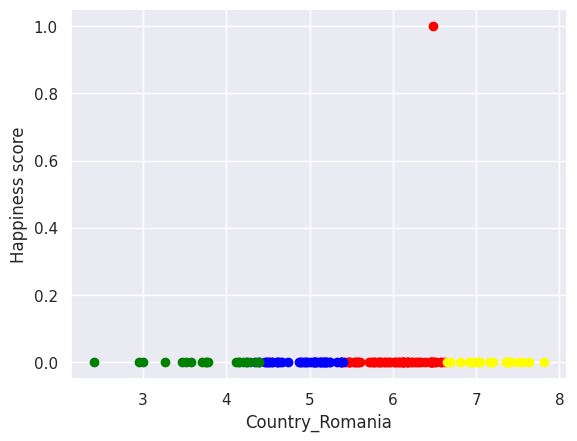

In [ ]:
i=0
for column in train1.columns:
  plt.scatter(X[y_means==0,0],X[y_means==0,i],color='red')
  plt.scatter(X[y_means==1,0],X[y_means==1,i],color='blue')
  plt.scatter(X[y_means==2,0],X[y_means==2,i],color='yellow')
  plt.scatter(X[y_means==3,0],X[y_means==3,i],color='green')
  plt.xlabel(column)
  plt.ylabel('Happiness score')
  plt.show()
  i+=1